In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 35.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninst

In [3]:
import yaml, shutil, random, os
from pathlib import Path
import numpy as np
from ultralytics import YOLO
# /kaggle/working/data_no_synth.yaml
yaml_no = Path('/kaggle/working/data_no_synth.yaml')
yaml_no.write_text(yaml.dump({
    'path': '/kaggle/input/knotsdetection1',
    'train': 'train/images',
    'val':   'train/images',          # Ultralytics auto-splits 80/20
    'test':  'test/images',
    'nc': 1,
    'names': ['olive_knot']
}, sort_keys=False))
print("✅  data_no_synth.yaml created")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅  data_no_synth.yaml created


# SIMPLE TRAINING

In [4]:
model = YOLO('yolov8n.pt')
model.train(
    data=str(Path('/kaggle/working/data_no_synth.yaml')),
    epochs=150,
    imgsz=640,
    patience=40,
    dropout=0.5,
    lr0=1e-3,
    weight_decay=1e-3,
    mixup=0.0,
    mosaic=1.0,
    close_mosaic=15,
    project='runs',
    name='no_synth',
    exist_ok=True,
    verbose=True
)

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=15, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data_no_synth.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.5, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=no_synth, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=40, perspective=0.0, plots=True, pose=12.0, p

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 11.1±4.3 MB/s, size: 42.9 KB)


train: Scanning /kaggle/input/knotsdetection1/train/labels... 173 images, 0 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<00:00, 302.07it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/knotsdetection1/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 71.7±14.2 MB/s, size: 45.4 KB)


val: Scanning /kaggle/input/knotsdetection1/train/labels... 173 images, 0 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<00:00, 1043.60it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/knotsdetection1/train is not writeable, cache not saved.


Plotting labels to runs/no_synth/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/no_synth
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.09G      2.345      3.412      2.099         57        640: 100%|██████████| 11/11 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.04it/s]

                   all        173        607    0.00788      0.674      0.128     0.0476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.58G      2.154      2.524        1.9         91        640: 100%|██████████| 11/11 [00:01<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.51it/s]

                   all        173        607    0.00913      0.781      0.201     0.0762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.59G      2.157      2.197      1.777         75        640: 100%|██████████| 11/11 [00:01<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.46it/s]

                   all        173        607    0.00933      0.797      0.212     0.0626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      2.61G      2.095      2.155       1.76         66        640: 100%|██████████| 11/11 [00:01<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.34it/s]

                   all        173        607      0.709     0.0841      0.245     0.0861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      2.63G      2.032      2.053      1.771         83        640: 100%|██████████| 11/11 [00:01<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.44it/s]

                   all        173        607      0.571      0.145      0.257     0.0891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.64G      2.109      2.088      1.808         48        640: 100%|██████████| 11/11 [00:01<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.61it/s]

                   all        173        607      0.231      0.156      0.129     0.0437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.66G      2.055      2.095      1.807         81        640: 100%|██████████| 11/11 [00:01<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.46it/s]

                   all        173        607     0.0834     0.0774     0.0329     0.0106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      2.68G      2.109       2.03       1.79         65        640: 100%|██████████| 11/11 [00:01<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.39it/s]

                   all        173        607      0.119      0.158     0.0799     0.0253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150       2.7G      2.148      2.025      1.784         87        640: 100%|██████████| 11/11 [00:01<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.40it/s]

                   all        173        607      0.124      0.288     0.0906     0.0275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      2.71G      2.081      1.856      1.742         90        640: 100%|██████████| 11/11 [00:01<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.44it/s]

                   all        173        607      0.478       0.42       0.37      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.73G      2.047      1.941      1.767        103        640: 100%|██████████| 11/11 [00:01<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.50it/s]

                   all        173        607      0.451      0.458      0.402      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.75G      2.028       1.83      1.737         73        640: 100%|██████████| 11/11 [00:01<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.26it/s]

                   all        173        607      0.454      0.514       0.41      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.76G      2.088       1.87      1.786         87        640: 100%|██████████| 11/11 [00:01<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.20it/s]

                   all        173        607      0.518      0.516      0.469      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.78G      2.119      1.954       1.81         63        640: 100%|██████████| 11/11 [00:01<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.75it/s]

                   all        173        607      0.428      0.418      0.382      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150       2.8G      2.032      1.863      1.723         89        640: 100%|██████████| 11/11 [00:01<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.27it/s]

                   all        173        607      0.458       0.48      0.417      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      2.81G      2.096      1.856      1.752         74        640: 100%|██████████| 11/11 [00:01<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.61it/s]

                   all        173        607      0.414      0.511      0.395      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.83G      2.059      1.799      1.718         73        640: 100%|██████████| 11/11 [00:01<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.64it/s]

                   all        173        607      0.518      0.515      0.483      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.85G      2.021      1.755       1.71         73        640: 100%|██████████| 11/11 [00:01<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.52it/s]

                   all        173        607      0.481      0.418      0.412      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.87G      2.035      1.792      1.735         63        640: 100%|██████████| 11/11 [00:01<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.34it/s]

                   all        173        607      0.448      0.424      0.356       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.88G      1.988       1.74      1.728         64        640: 100%|██████████| 11/11 [00:01<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.54it/s]

                   all        173        607      0.492      0.488      0.477      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150       2.9G      2.019      1.742      1.708         92        640: 100%|██████████| 11/11 [00:01<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.82it/s]

                   all        173        607      0.506      0.483      0.494      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.92G      1.992      1.669      1.694         83        640: 100%|██████████| 11/11 [00:01<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.63it/s]

                   all        173        607      0.599      0.534      0.555      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.93G      1.952       1.68      1.717         52        640: 100%|██████████| 11/11 [00:01<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.70it/s]

                   all        173        607      0.549      0.517      0.532      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      2.95G      1.943      1.663      1.702         72        640: 100%|██████████| 11/11 [00:01<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.56it/s]

                   all        173        607      0.606       0.55      0.584       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.97G      1.964      1.644      1.682         90        640: 100%|██████████| 11/11 [00:01<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.64it/s]

                   all        173        607      0.597      0.591      0.606      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.99G      1.962      1.619      1.703         42        640: 100%|██████████| 11/11 [00:01<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.61it/s]

                   all        173        607      0.674      0.554      0.621      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150         3G      1.983       1.54      1.717         67        640: 100%|██████████| 11/11 [00:01<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.53it/s]

                   all        173        607      0.695      0.665      0.714      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      3.02G      1.971      1.612      1.696         83        640: 100%|██████████| 11/11 [00:01<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.81it/s]

                   all        173        607      0.719      0.593      0.687       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      3.04G      1.921      1.561      1.672         63        640: 100%|██████████| 11/11 [00:01<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.76it/s]

                   all        173        607      0.662      0.654      0.672      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      3.05G      1.944      1.573      1.695         54        640: 100%|██████████| 11/11 [00:01<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.51it/s]

                   all        173        607      0.608      0.611      0.617      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      3.07G      2.035      1.573      1.734         81        640: 100%|██████████| 11/11 [00:01<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.71it/s]

                   all        173        607      0.701      0.606      0.687      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      3.09G      1.918      1.502       1.69         61        640: 100%|██████████| 11/11 [00:01<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.83it/s]

                   all        173        607      0.723      0.662      0.727      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      3.11G       1.95      1.509      1.691         97        640: 100%|██████████| 11/11 [00:01<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.90it/s]

                   all        173        607      0.689      0.683      0.726      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      3.12G      1.916      1.457      1.653         66        640: 100%|██████████| 11/11 [00:01<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.69it/s]

                   all        173        607      0.704      0.662      0.711      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      3.14G      1.879      1.513      1.627         92        640: 100%|██████████| 11/11 [00:01<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.64it/s]

                   all        173        607      0.685      0.662      0.717       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      3.16G      1.888      1.455      1.642         76        640: 100%|██████████| 11/11 [00:01<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.60it/s]

                   all        173        607      0.729      0.644      0.702      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      3.17G      1.892      1.467      1.651         97        640: 100%|██████████| 11/11 [00:01<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.49it/s]

                   all        173        607      0.704      0.661      0.707      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      3.19G      1.873      1.439      1.594         82        640: 100%|██████████| 11/11 [00:01<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.80it/s]

                   all        173        607      0.583      0.611      0.596      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      3.21G      1.854      1.424       1.63         80        640: 100%|██████████| 11/11 [00:01<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.61it/s]

                   all        173        607      0.711      0.608      0.672      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      3.22G      1.861      1.448      1.631         69        640: 100%|██████████| 11/11 [00:01<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.11it/s]

                   all        173        607       0.71      0.666      0.709      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      3.24G      1.813      1.378      1.607         67        640: 100%|██████████| 11/11 [00:01<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.65it/s]

                   all        173        607      0.735      0.708       0.77      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      3.26G      1.839       1.43      1.639         60        640: 100%|██████████| 11/11 [00:01<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.72it/s]

                   all        173        607      0.768      0.691      0.765      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      3.27G       1.86      1.419      1.645         76        640: 100%|██████████| 11/11 [00:01<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.66it/s]

                   all        173        607      0.728      0.695      0.752      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      3.29G      1.769      1.335      1.571         94        640: 100%|██████████| 11/11 [00:01<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.97it/s]

                   all        173        607      0.775      0.733      0.789      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      3.31G      1.719       1.36      1.546         44        640: 100%|██████████| 11/11 [00:01<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.62it/s]

                   all        173        607      0.769      0.712      0.785      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      3.33G      1.744      1.332      1.566         85        640: 100%|██████████| 11/11 [00:01<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.80it/s]

                   all        173        607      0.779      0.736      0.818      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      3.34G      1.768      1.321      1.575         78        640: 100%|██████████| 11/11 [00:01<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.79it/s]

                   all        173        607      0.774      0.683      0.767      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      3.36G      1.785      1.301      1.587         55        640: 100%|██████████| 11/11 [00:01<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.94it/s]

                   all        173        607      0.786      0.768      0.828       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      3.38G       1.78      1.314      1.563         75        640: 100%|██████████| 11/11 [00:01<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.99it/s]

                   all        173        607      0.797      0.761      0.828      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      3.39G        1.8      1.306      1.587         64        640: 100%|██████████| 11/11 [00:01<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.65it/s]

                   all        173        607      0.765       0.72      0.786      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      3.41G      1.689      1.245      1.522         97        640: 100%|██████████| 11/11 [00:01<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  6.00it/s]

                   all        173        607      0.784       0.74      0.826       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      3.43G      1.699      1.209      1.534         89        640: 100%|██████████| 11/11 [00:01<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.70it/s]

                   all        173        607      0.785      0.771      0.837      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      3.45G      1.692      1.213      1.497         94        640: 100%|██████████| 11/11 [00:01<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.90it/s]

                   all        173        607      0.819      0.767      0.857      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      3.46G      1.745      1.283      1.568         86        640: 100%|██████████| 11/11 [00:01<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.79it/s]

                   all        173        607      0.803      0.779      0.849      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      3.48G      1.734      1.226      1.538         72        640: 100%|██████████| 11/11 [00:01<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.50it/s]

                   all        173        607      0.746      0.761      0.801      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150       3.5G      1.705      1.269      1.531         54        640: 100%|██████████| 11/11 [00:01<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.87it/s]

                   all        173        607      0.723      0.705       0.76      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      3.52G      1.653       1.21      1.486         82        640: 100%|██████████| 11/11 [00:01<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.75it/s]

                   all        173        607      0.793      0.778      0.843      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      3.53G      1.656      1.159      1.503         76        640: 100%|██████████| 11/11 [00:01<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.85it/s]

                   all        173        607      0.827      0.819      0.885      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      3.55G      1.726      1.185       1.52         77        640: 100%|██████████| 11/11 [00:01<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.79it/s]

                   all        173        607      0.806      0.745      0.831      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      3.57G      1.662      1.195      1.512         60        640: 100%|██████████| 11/11 [00:01<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.67it/s]

                   all        173        607      0.783      0.759      0.826      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      3.58G      1.634      1.205      1.507         79        640: 100%|██████████| 11/11 [00:01<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.01it/s]

                   all        173        607      0.821      0.784      0.854      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150       3.6G      1.662      1.202      1.512         82        640: 100%|██████████| 11/11 [00:01<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.91it/s]

                   all        173        607      0.765       0.84      0.864      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      3.62G      1.636        1.2       1.48         56        640: 100%|██████████| 11/11 [00:01<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.90it/s]

                   all        173        607      0.804      0.801      0.855      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      3.63G      1.626      1.115      1.459         99        640: 100%|██████████| 11/11 [00:01<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.86it/s]

                   all        173        607      0.862      0.783      0.868      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      3.65G      1.595       1.12      1.475         77        640: 100%|██████████| 11/11 [00:01<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.99it/s]

                   all        173        607      0.827      0.784      0.868      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      3.67G      1.565      1.076      1.436         71        640: 100%|██████████| 11/11 [00:01<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.04it/s]

                   all        173        607      0.853      0.796      0.887      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      3.69G      1.607      1.106      1.469         63        640: 100%|██████████| 11/11 [00:01<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.83it/s]

                   all        173        607      0.831      0.801      0.874      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150       3.7G      1.526      1.069      1.405         98        640: 100%|██████████| 11/11 [00:01<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.96it/s]

                   all        173        607      0.782      0.843      0.851      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      3.72G       1.59      1.113      1.463         89        640: 100%|██████████| 11/11 [00:01<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.71it/s]

                   all        173        607      0.789      0.786      0.842      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      3.74G      1.532      1.059      1.422         54        640: 100%|██████████| 11/11 [00:01<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.01it/s]

                   all        173        607      0.774      0.852      0.875      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      3.75G      1.574      1.091      1.432         83        640: 100%|██████████| 11/11 [00:01<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.95it/s]

                   all        173        607      0.878      0.852      0.923      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      3.77G      1.516       1.03       1.43         52        640: 100%|██████████| 11/11 [00:01<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.63it/s]

                   all        173        607      0.874      0.877      0.927      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      3.79G      1.544      1.047      1.417         79        640: 100%|██████████| 11/11 [00:01<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.60it/s]

                   all        173        607      0.891      0.863      0.917      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150       3.8G       1.56      1.065      1.422         96        640: 100%|██████████| 11/11 [00:01<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.95it/s]

                   all        173        607       0.86       0.87       0.91      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      3.82G      1.538      1.085      1.407         59        640: 100%|██████████| 11/11 [00:01<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.01it/s]

                   all        173        607      0.873      0.848      0.921      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      3.84G      1.441     0.9986      1.347         69        640: 100%|██████████| 11/11 [00:01<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.67it/s]

                   all        173        607      0.874      0.853      0.911      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      3.86G      1.468      1.004      1.375         82        640: 100%|██████████| 11/11 [00:01<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.96it/s]

                   all        173        607      0.872      0.871      0.922      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      3.87G      1.482     0.9751      1.397         78        640: 100%|██████████| 11/11 [00:01<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.94it/s]

                   all        173        607      0.884      0.881      0.929      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      3.89G      1.469      1.018      1.378         51        640: 100%|██████████| 11/11 [00:01<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.89it/s]

                   all        173        607      0.872      0.881      0.925      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      3.91G       1.51      1.002      1.408         82        640: 100%|██████████| 11/11 [00:01<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.79it/s]

                   all        173        607      0.885      0.896      0.937      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      3.92G      1.449      1.024      1.348         62        640: 100%|██████████| 11/11 [00:01<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.17it/s]

                   all        173        607      0.903      0.887      0.941      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      3.94G      1.524      1.013      1.429         76        640: 100%|██████████| 11/11 [00:01<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.95it/s]

                   all        173        607      0.909      0.891      0.945      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      3.96G      1.433      1.025      1.366         52        640: 100%|██████████| 11/11 [00:01<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.55it/s]

                   all        173        607      0.902      0.893      0.946      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      3.98G      1.451     0.9946      1.356         69        640: 100%|██████████| 11/11 [00:01<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.92it/s]

                   all        173        607      0.911      0.879      0.941      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      3.99G      1.424     0.9608      1.362         61        640: 100%|██████████| 11/11 [00:01<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.01it/s]

                   all        173        607      0.929       0.89      0.954      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      4.01G      1.419     0.9195      1.342         75        640: 100%|██████████| 11/11 [00:01<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.73it/s]

                   all        173        607      0.913      0.882      0.953      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      4.03G      1.403     0.9337       1.34         61        640: 100%|██████████| 11/11 [00:01<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.01it/s]

                   all        173        607      0.903      0.902       0.95      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      4.04G      1.383     0.9218      1.341         52        640: 100%|██████████| 11/11 [00:01<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.19it/s]

                   all        173        607      0.904      0.918      0.955      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      4.06G      1.382     0.8957      1.328         79        640: 100%|██████████| 11/11 [00:01<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.21it/s]

                   all        173        607      0.897      0.904      0.951      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      4.08G      1.397     0.9421      1.336         68        640: 100%|██████████| 11/11 [00:01<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.83it/s]

                   all        173        607      0.901      0.888      0.948      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150       4.1G      1.401     0.9683      1.333         65        640: 100%|██████████| 11/11 [00:01<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.93it/s]

                   all        173        607      0.919      0.893      0.958      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      4.11G      1.397     0.9218      1.308         76        640: 100%|██████████| 11/11 [00:01<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.81it/s]

                   all        173        607      0.886      0.914      0.954      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      4.13G      1.396     0.9348      1.332         50        640: 100%|██████████| 11/11 [00:01<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.91it/s]

                   all        173        607      0.913      0.914      0.958      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      4.15G      1.409     0.9537       1.33         63        640: 100%|██████████| 11/11 [00:01<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.81it/s]

                   all        173        607      0.931      0.909      0.958       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      4.16G      1.303     0.8596      1.273         57        640: 100%|██████████| 11/11 [00:01<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.91it/s]

                   all        173        607      0.926       0.89      0.949      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      4.18G      1.356     0.8981      1.321         69        640: 100%|██████████| 11/11 [00:01<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.05it/s]

                   all        173        607      0.901      0.929      0.961      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150       4.2G      1.375     0.9395      1.322         78        640: 100%|██████████| 11/11 [00:01<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.71it/s]

                   all        173        607      0.924      0.921      0.963      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      4.21G      1.277     0.8731      1.277         88        640: 100%|██████████| 11/11 [00:01<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.93it/s]

                   all        173        607      0.937      0.903       0.96       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      4.23G      1.324     0.8469      1.266         80        640: 100%|██████████| 11/11 [00:01<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.75it/s]

                   all        173        607      0.931      0.918      0.968      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      4.25G      1.282     0.7839      1.234         82        640: 100%|██████████| 11/11 [00:01<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.84it/s]

                   all        173        607      0.937      0.931      0.968      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      4.27G      1.322     0.8943      1.275         50        640: 100%|██████████| 11/11 [00:01<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.74it/s]

                   all        173        607      0.943      0.934      0.968      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      4.28G      1.262      0.855      1.255         73        640: 100%|██████████| 11/11 [00:01<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.84it/s]

                   all        173        607      0.934      0.924      0.962      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150       4.3G      1.238      0.839      1.232         79        640: 100%|██████████| 11/11 [00:01<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.85it/s]

                   all        173        607       0.93      0.924      0.961      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      4.32G      1.224     0.7897       1.21         63        640: 100%|██████████| 11/11 [00:01<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.66it/s]

                   all        173        607       0.94      0.935      0.969      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      4.33G      1.296     0.8198      1.275         52        640: 100%|██████████| 11/11 [00:01<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.89it/s]

                   all        173        607      0.938      0.939      0.973      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      4.35G      1.212     0.7998      1.206         81        640: 100%|██████████| 11/11 [00:01<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.37it/s]

                   all        173        607      0.944      0.934      0.976      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      4.37G      1.225     0.7758      1.232         77        640: 100%|██████████| 11/11 [00:01<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.80it/s]

                   all        173        607      0.953      0.926      0.975      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      4.38G      1.245     0.8478      1.225         58        640: 100%|██████████| 11/11 [00:01<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  6.00it/s]

                   all        173        607      0.943      0.933      0.975      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150       4.4G      1.211     0.8016      1.213         86        640: 100%|██████████| 11/11 [00:01<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.86it/s]

                   all        173        607      0.924      0.942      0.972      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      4.42G      1.196      0.799      1.216         76        640: 100%|██████████| 11/11 [00:01<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.84it/s]

                   all        173        607      0.931      0.944      0.971      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      4.44G      1.272     0.8387      1.241         77        640: 100%|██████████| 11/11 [00:01<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.89it/s]

                   all        173        607      0.927      0.942      0.976      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      4.45G      1.207      0.809       1.22         63        640: 100%|██████████| 11/11 [00:01<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.08it/s]

                   all        173        607       0.95      0.937      0.979      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      4.47G      1.227     0.7935      1.222         85        640: 100%|██████████| 11/11 [00:01<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.81it/s]

                   all        173        607      0.955      0.936      0.979      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      4.49G      1.193       0.79      1.196         74        640: 100%|██████████| 11/11 [00:01<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.41it/s]

                   all        173        607      0.931      0.951       0.98      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      4.51G      1.229     0.8251      1.241         67        640: 100%|██████████| 11/11 [00:01<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.09it/s]

                   all        173        607      0.944      0.949      0.981       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      4.52G      1.211     0.7868       1.19         84        640: 100%|██████████| 11/11 [00:01<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.61it/s]

                   all        173        607      0.958      0.939      0.982       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      4.54G      1.192     0.8181      1.233         44        640: 100%|██████████| 11/11 [00:01<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.77it/s]

                   all        173        607      0.948      0.944      0.983      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      4.56G      1.148     0.7645      1.193         92        640: 100%|██████████| 11/11 [00:01<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.12it/s]

                   all        173        607      0.956      0.946      0.985      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      4.57G      1.151     0.7806      1.192         81        640: 100%|██████████| 11/11 [00:01<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.93it/s]

                   all        173        607      0.956      0.946      0.983      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      4.59G      1.161     0.7545      1.207         73        640: 100%|██████████| 11/11 [00:01<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.06it/s]

                   all        173        607      0.956      0.952      0.983      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      4.61G      1.195     0.7775      1.217         71        640: 100%|██████████| 11/11 [00:01<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.95it/s]

                   all        173        607      0.954      0.952      0.983      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      4.62G      1.198     0.7774      1.201         90        640: 100%|██████████| 11/11 [00:01<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.96it/s]

                   all        173        607      0.951      0.962      0.983      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      4.64G      1.142     0.7448      1.177         54        640: 100%|██████████| 11/11 [00:01<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.01it/s]

                   all        173        607      0.963      0.949      0.985      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      4.66G      1.129     0.7471      1.179         64        640: 100%|██████████| 11/11 [00:01<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.02it/s]

                   all        173        607      0.959      0.953      0.982      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      4.68G      1.158      0.742      1.196         81        640: 100%|██████████| 11/11 [00:01<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.33it/s]

                   all        173        607       0.96      0.951       0.98      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      4.69G      1.155     0.7569      1.193         69        640: 100%|██████████| 11/11 [00:01<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.66it/s]

                   all        173        607      0.963      0.951      0.981      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      4.71G      1.078     0.7138      1.135         93        640: 100%|██████████| 11/11 [00:01<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.81it/s]

                   all        173        607      0.956      0.951      0.983      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      4.73G      1.093     0.7112      1.158         64        640: 100%|██████████| 11/11 [00:01<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.92it/s]

                   all        173        607       0.96      0.952      0.985      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      4.74G      1.104     0.7574      1.184         59        640: 100%|██████████| 11/11 [00:01<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.82it/s]

                   all        173        607      0.954      0.967      0.985      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      4.76G      1.081     0.7249      1.138         67        640: 100%|██████████| 11/11 [00:01<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.08it/s]

                   all        173        607      0.962      0.959      0.986      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      4.78G      1.064     0.6928      1.146         79        640: 100%|██████████| 11/11 [00:01<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.88it/s]

                   all        173        607      0.962       0.96      0.986      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      4.79G      1.087     0.7122       1.14         55        640: 100%|██████████| 11/11 [00:01<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.70it/s]

                   all        173        607      0.953       0.96      0.984      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      4.81G      1.049     0.7107       1.14         63        640: 100%|██████████| 11/11 [00:01<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.87it/s]

                   all        173        607      0.956      0.959      0.985      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      4.83G      1.115     0.7381      1.162         78        640: 100%|██████████| 11/11 [00:01<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.45it/s]

                   all        173        607      0.962      0.957      0.986      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      4.85G      1.063      0.751      1.135         39        640: 100%|██████████| 11/11 [00:01<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.81it/s]

                   all        173        607      0.966      0.951      0.987       0.78


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      4.86G       1.03     0.6702      1.124         31        640: 100%|██████████| 11/11 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.74it/s]

                   all        173        607      0.965      0.949      0.987      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      4.88G      1.028     0.6736       1.13         50        640: 100%|██████████| 11/11 [00:01<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.17it/s]

                   all        173        607      0.963       0.96      0.988      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150       4.9G      1.036     0.6578      1.122         43        640: 100%|██████████| 11/11 [00:01<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.83it/s]

                   all        173        607      0.962      0.957      0.988      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      4.91G     0.9716     0.6448      1.094         49        640: 100%|██████████| 11/11 [00:01<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.00it/s]

                   all        173        607      0.967      0.956      0.988      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      4.93G      1.025     0.6144      1.131         39        640: 100%|██████████| 11/11 [00:01<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.93it/s]

                   all        173        607      0.967      0.956      0.989      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      4.95G      1.002     0.6391      1.112         68        640: 100%|██████████| 11/11 [00:01<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.85it/s]

                   all        173        607      0.965       0.96      0.989      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      4.97G     0.9815     0.6235      1.104         49        640: 100%|██████████| 11/11 [00:01<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.02it/s]

                   all        173        607      0.961      0.956      0.988      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      4.98G      0.937     0.5708      1.087         26        640: 100%|██████████| 11/11 [00:01<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.87it/s]

                   all        173        607       0.96      0.958      0.988      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150         5G     0.9456      0.602      1.081         42        640: 100%|██████████| 11/11 [00:01<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.26it/s]

                   all        173        607      0.965      0.954      0.988      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      5.02G     0.8851      0.551      1.051         45        640: 100%|██████████| 11/11 [00:01<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.05it/s]

                   all        173        607      0.968      0.957      0.989      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      5.04G     0.9249     0.5676      1.057         47        640: 100%|██████████| 11/11 [00:01<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.31it/s]

                   all        173        607      0.967      0.962      0.989      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      5.05G     0.9251     0.5635      1.094         46        640: 100%|██████████| 11/11 [00:01<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.08it/s]

                   all        173        607      0.965      0.964       0.99      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      5.07G     0.9308     0.5967      1.079         43        640: 100%|██████████| 11/11 [00:01<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.16it/s]

                   all        173        607      0.961      0.968      0.989      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      5.09G      0.907     0.5724      1.067         34        640: 100%|██████████| 11/11 [00:01<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.68it/s]

                   all        173        607      0.963      0.965       0.99      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150       5.1G      0.888     0.5797      1.054         36        640: 100%|██████████| 11/11 [00:01<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.85it/s]

                   all        173        607      0.965      0.967       0.99      0.813



150 epochs completed in 0.127 hours.
Optimizer stripped from runs/no_synth/weights/last.pt, 6.3MB
Optimizer stripped from runs/no_synth/weights/best.pt, 6.3MB

Validating runs/no_synth/weights/best.pt...
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        173        607      0.964      0.967       0.99      0.815
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/no_synth


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dbf6c2a6690>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

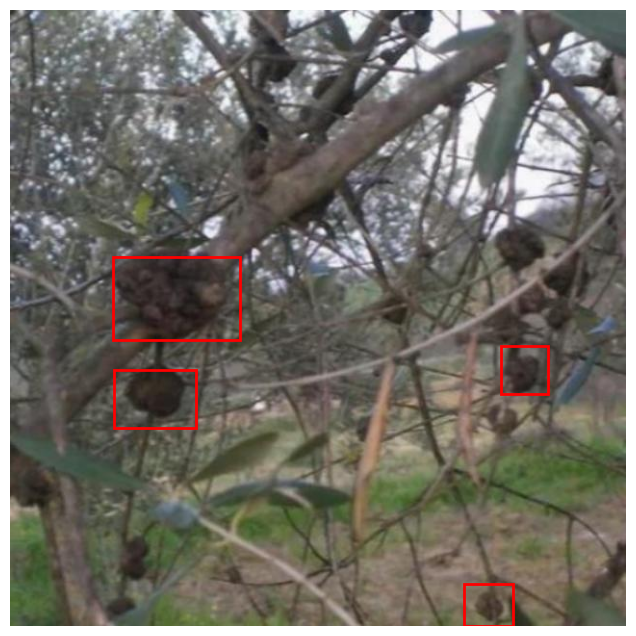

In [13]:
# inference_no_synth.py – single-image, no labels/conf
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
from ultralytics import YOLO

# 1. load the *first* model (trained without synthetic data)
MODEL = Path('/kaggle/working/runs/no_synth/weights/best.pt')
model = YOLO(MODEL)

# 2. change only this path
IMG_PATH = Path('/kaggle/input/knotsdetection1/test/images/Capture-d-ecran-2025-07-01-115215_jpg.rf.21f265d86a6829e3be98aecd70155e08.jpg')

# 3. predict
results = model.predict(source=IMG_PATH, imgsz=640, conf=0.3, verbose=False)[0]

# 4. draw boxes only
img = cv2.imread(str(IMG_PATH))[:, :, ::-1]   # BGR → RGB
h, w = img.shape[:2]
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
for box in results.boxes.xyxy.cpu().numpy():
    x1, y1, x2, y2 = box
    plt.gca().add_patch(plt.Rectangle(
        (x1, y1), x2-x1, y2-y1,
        linewidth=2, edgecolor='red', facecolor='none'))
plt.show()

In [5]:
# test_mAP_report.py
from ultralytics import YOLO
from pathlib import Path

# choose the checkpoint you want to evaluate
CKPT = Path('/kaggle/working/runs/no_synth/weights/best.pt')   # or 'runs/with_synthetic/weights/best.pt'

model = YOLO(CKPT)

# official evaluation on the untouched 50-image test set
metrics = model.val(
    data='/kaggle/working/data_no_synth.yaml',   # same yaml used during training
    split='test',
    imgsz=640,
    conf=0.001,
    iou=0.5,
    verbose=True
)

print('\n========== FINAL TEST-SET METRICS ==========')
print(f'mAP@0.50     : {metrics.box.map50:.4f}')
print(f'mAP@0.50:0.95: {metrics.box.map:.4f}')
print(f'Precision    : {metrics.box.mp:.4f}')
print(f'Recall       : {metrics.box.mr:.4f}')
print('Done.')

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 15.9±6.6 MB/s, size: 60.9 KB)


val: Scanning /kaggle/input/knotsdetection1/test/labels... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 301.66it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/knotsdetection1/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         50        184      0.467       0.38      0.366      0.111
Speed: 3.9ms preprocess, 12.1ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs/detect/val

========== FINAL TEST-SET METRICS ==========
mAP@0.50     : 0.3659
mAP@0.50:0.95: 0.1112
Precision    : 0.4670
Recall       : 0.3804
Done.


**WE GOT BAD PERFORMANCE SO WE'RE ATTACKING THE PROBLEM WITH NEW APPROACHES**

# CREATING SYNTHETIC DATA

In [19]:
import cv2, random, yaml, numpy as np
from pathlib import Path

# --- fixed paths ---
IMG_SRC   = Path('/kaggle/input/knotsdetection1/train/images')
LBL_SRC   = Path('/kaggle/input/knotsdetection1/train/labels')
SYN_DIR   = Path('/kaggle/working/synthetic')
SYN_DIR.mkdir(exist_ok=True)
(SYN_DIR/'images').mkdir(exist_ok=True)
(SYN_DIR/'labels').mkdir(exist_ok=True)

# collect knot crops
knots = []
for img_path in IMG_SRC.glob('*'):
    img = cv2.imread(str(img_path))
    if img is None:
        continue
    h, w = img.shape[:2]
    lbl = LBL_SRC / (img_path.stem + '.txt')
    if not lbl.exists() or lbl.stat().st_size == 0:
        continue
    for line in lbl.read_text().splitlines():
        if not line.strip():
            continue
        cls, cx, cy, bw, bh = map(float, line.strip().split())
        x1 = max(0, int((cx - bw/2) * w))
        y1 = max(0, int((cy - bh/2) * h))
        x2 = min(w, int((cx + bw/2) * w))
        y2 = min(h, int((cy + bh/2) * h))
        if x2 > x1 and y2 > y1:
            knots.append(img[y1:y2, x1:x2])

if not knots:
    raise ValueError("Still no knots – verify *.txt files in /kaggle/input/knotsdetection/train/labels")

# 300 random bark backgrounds + paste
def random_bark(h=640, w=640):
    bg = np.random.randint(60, 120, (h, w, 3), dtype=np.uint8)
    for _ in range(20):
        x = random.randint(0, w-1)
        cv2.line(bg, (x, 0), (x, h), int(random.randint(40, 100)), 1)
    return bg

random.seed(42)
for idx in range(300):
    bg = random_bark()
    h_bg, w_bg = bg.shape[:2]
    knot = random.choice(knots)
    knot = cv2.resize(knot, (0, 0), fx=random.uniform(0.7, 1.3), fy=random.uniform(0.7, 1.3))
    h_k, w_k = knot.shape[:2]
    y = random.randint(0, h_bg - h_k)
    x = random.randint(0, w_bg - w_k)
    bg[y:y+h_k, x:x+w_k] = knot
    cv2.imwrite(str(SYN_DIR/'images'/f'syn_{idx:04d}.jpg'), bg)

    x_c = (x + w_k/2) / w_bg
    y_c = (y + h_k/2) / h_bg
    w_l = w_k / w_bg
    h_l = h_k / h_bg
    (SYN_DIR/'labels'/f'syn_{idx:04d}.txt').write_text(f'0 {x_c} {y_c} {w_l} {h_l}\n')

# YAML that points to original + synthetic
yaml_with = Path('/kaggle/working/data_with_synth.yaml')
yaml_with.write_text(yaml.dump({
    'path': '/kaggle',                         # root of both sources
    'train': [
        'input/knotsdetection/train/images',
        'working/synthetic/images'
    ],
    'val':   'input/knotsdetection/train/images',    # auto-split 80/20
    'test':  'input/knotsdetection/test/images',
    'nc': 1,
    'names': ['olive_knot']
}, sort_keys=False))
print("✅  synthetic images + data_with_synth.yaml ready")

✅  synthetic images + data_with_synth.yaml ready


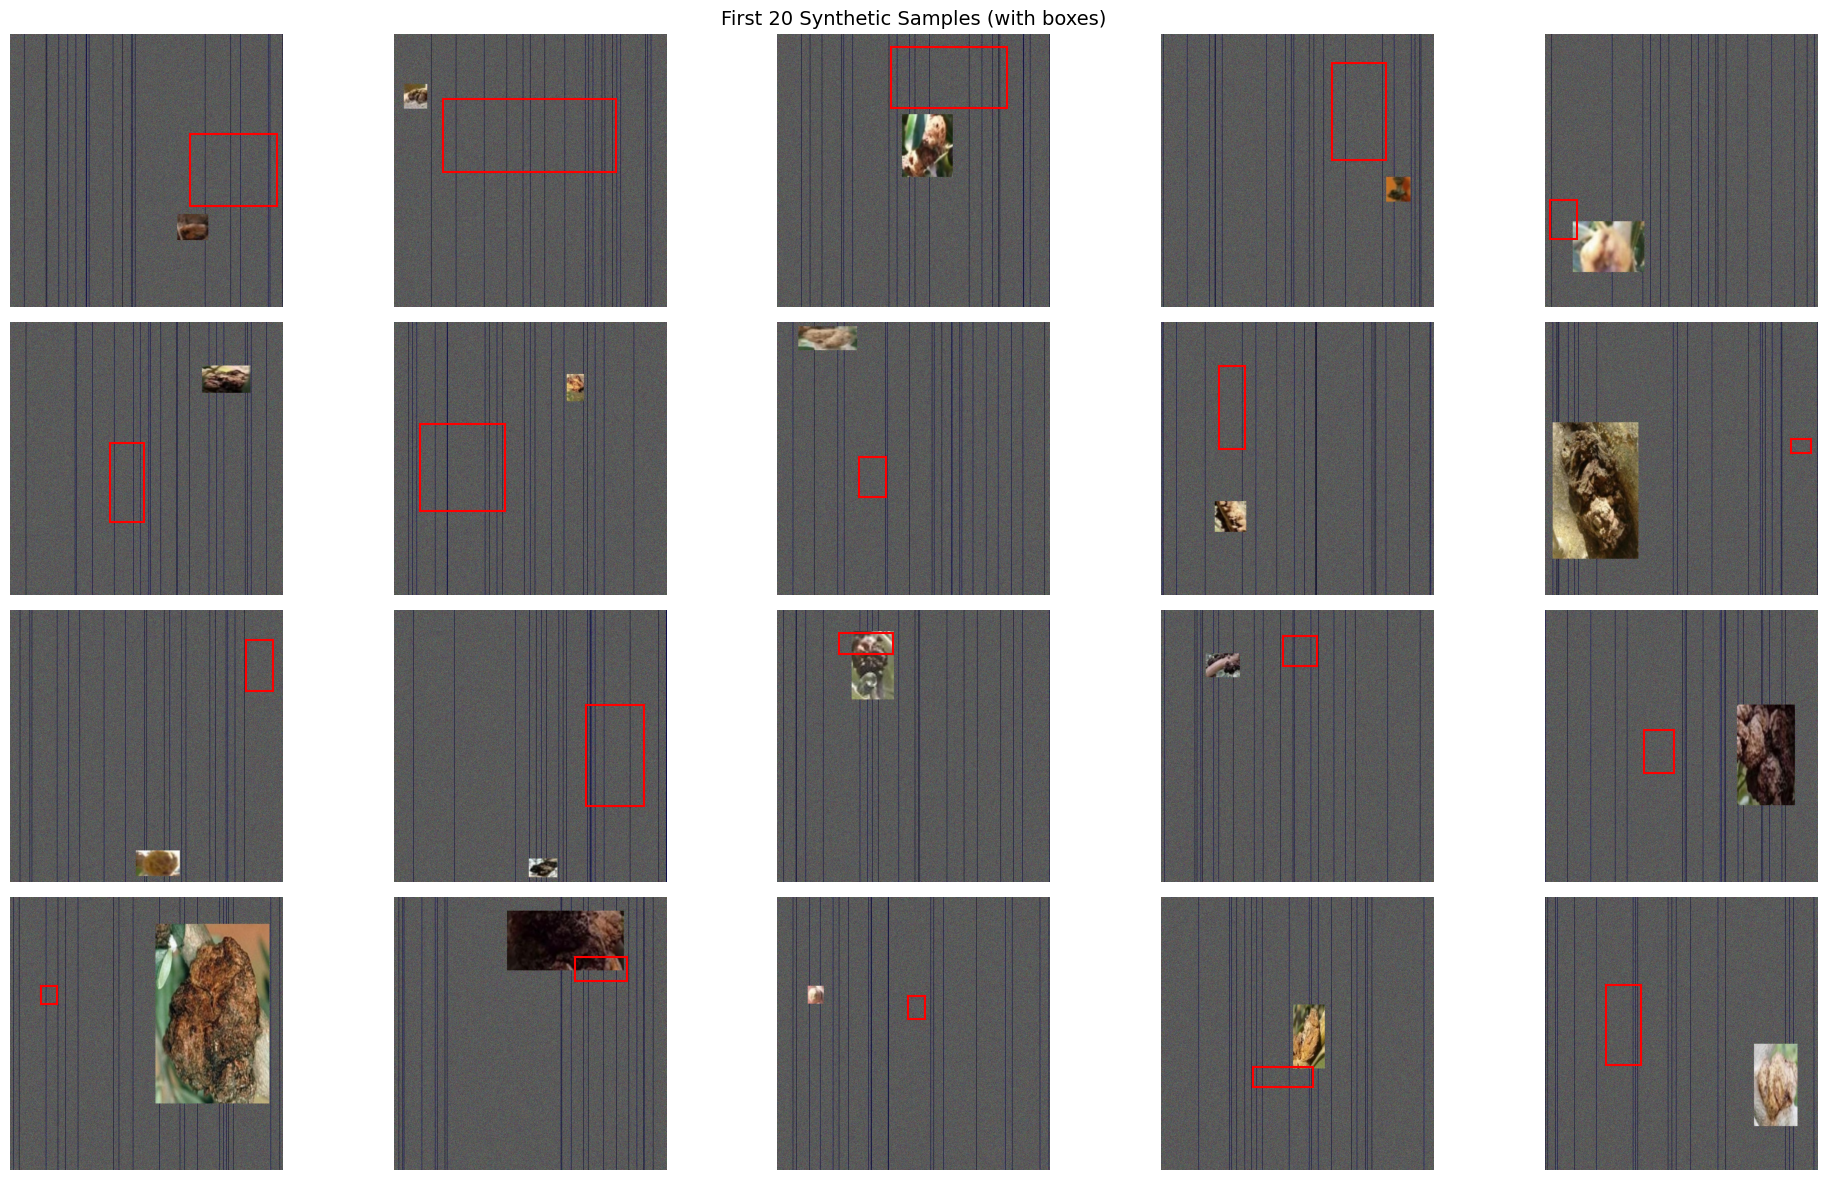

In [23]:
# visualize_20_synthetic.py
import matplotlib.pyplot as plt
from pathlib import Path

SYN_IMGS = Path('/kaggle/working/synthetic/images')
SYN_LBLS = Path('/kaggle/working/synthetic/labels')

# pick first 20 synthetic pairs
pairs = list(zip(SYN_IMGS.glob('*.jpg'), SYN_LBLS.glob('*.txt')))[:20]

fig, axes = plt.subplots(4, 5, figsize=(20, 12))
axes = axes.flatten()

for ax, (img_path, lbl_path) in zip(axes, pairs):
    # load image
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.axis('off')

    # draw boxes (xywh → xyxy)
    h, w, _ = img.shape
    for line in lbl_path.read_text().splitlines():
        cls, cx, cy, bw, bh = map(float, line.strip().split())
        x1 = int((cx - bw/2) * w)
        y1 = int((cy - bh/2) * h)
        x2 = int((cx + bw/2) * w)
        y2 = int((cy + bh/2) * h)
        ax.add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1,
                                   linewidth=1.5, edgecolor='red', facecolor='none'))

fig.suptitle('First 20 Synthetic Samples (with boxes)', fontsize=14)
plt.tight_layout()
plt.show()

**BAD ACCURACY**

**CLEANING THE OLD PICTURES AND CREATING NEW ONES**

In [46]:
# 1️⃣ delete old synthetic folder
import shutil
from pathlib import Path

SYN_DIR = Path('/kaggle/working/synthetic')
if SYN_DIR.exists():
    shutil.rmtree(SYN_DIR)
print("✅ old synthetic folder deleted")

✅ old synthetic folder deleted


In [47]:
import cv2
import random
import numpy as np
from pathlib import Path

# --- Configuration ---
SRC_IMG_DIR = Path('/kaggle/input/knotsdetection1/train/images')
SRC_LBL_DIR = Path('/kaggle/input/knotsdetection1/train/labels')
OUT_DIR     = Path('/kaggle/working/synthetic')
NUM_SYN     = 300
BG_HEIGHT, BG_WIDTH = 640, 640  # background size
SCALE_MIN, SCALE_MAX = 0.7, 1.3  # scale range for crops
CLASS_ID = 0                   # single class

# Create output folders
(OUT_DIR / 'images').mkdir(parents=True, exist_ok=True)
(OUT_DIR / 'labels').mkdir(parents=True, exist_ok=True)

# 1. Load and extract all knot crops
crops = []
for img_path in SRC_IMG_DIR.glob('*.jpg'):
    img = cv2.imread(str(img_path))
    if img is None:
        continue
    h_img, w_img = img.shape[:2]
    label_file = SRC_LBL_DIR / f"{img_path.stem}.txt"
    if not label_file.exists():
        continue
    for line in label_file.read_text().splitlines():
        cls, cx, cy, bw, bh = map(float, line.split())
        # Convert normalized bbox to pixel coords
        x1 = int((cx - bw/2) * w_img)
        y1 = int((cy - bh/2) * h_img)
        x2 = int((cx + bw/2) * w_img)
        y2 = int((cy + bh/2) * h_img)
        # Clamp coords
        x1, y1 = max(0, x1), max(0, y1)
        x2, y2 = min(w_img, x2), min(h_img, y2)
        if x2 <= x1 or y2 <= y1:
            continue
        crop = img[y1:y2, x1:x2]
        crops.append(crop)

if not crops:
    raise RuntimeError("No knot crops found — check your labels.")

# Fix seeds for reproducibility
random.seed(42)
np.random.seed(42)

# 2. Generate centered synthetic images
for idx in range(NUM_SYN):
    # 2.1 Create a textured bark background
    bg = np.random.randint(80, 120, (BG_HEIGHT, BG_WIDTH, 3), dtype=np.uint8)
    for _ in range(20):
        x_line = random.randint(0, BG_WIDTH - 1)
        val = int(random.uniform(40, 100))
        cv2.line(bg, (x_line, 0), (x_line, BG_HEIGHT), (val,)*3, 1)

    # 2.2 Select and resize a random crop
    crop = random.choice(crops)
    h_crop, w_crop = crop.shape[:2]
    # --- Block: crop original size ---
    # h_crop, w_crop now hold the pixel size of the extracted knot

    scale = random.uniform(SCALE_MIN, SCALE_MAX)
    new_w = int(w_crop * scale)
    new_h = int(h_crop * scale)
    # Clamp if exceeds background
    if new_w >= BG_WIDTH or new_h >= BG_HEIGHT:
        scale_clamp = min((BG_WIDTH-1)/w_crop, (BG_HEIGHT-1)/h_crop)
        new_w, new_h = int(w_crop * scale_clamp), int(h_crop * scale_clamp)
    crop_resized = cv2.resize(crop, (new_w, new_h), interpolation=cv2.INTER_AREA)

    # --- Block: compute centered placement ---
    x_tl = (BG_WIDTH - new_w) // 2
    y_tl = (BG_HEIGHT - new_h) // 2
    bg[y_tl:y_tl+new_h, x_tl:x_tl+new_w] = crop_resized

    # --- Block: calculate normalized bbox ---
    # Absolute center
    x_center = x_tl + new_w / 2
    y_center = y_tl + new_h / 2
    # Normalized
    width_norm  = new_w / BG_WIDTH
    height_norm = new_h / BG_HEIGHT
    x_center_norm = x_center / BG_WIDTH
    y_center_norm = y_center / BG_HEIGHT

    # Debug check: bbox area vs crop area ratio
    # bbox_area = width_norm * height_norm
    # crop_area_norm = (w_crop * h_crop) / (BG_WIDTH * BG_HEIGHT)
    # print(f"Debug idx={idx}: bbox_area={bbox_area:.4f}, orig_crop_area_norm={crop_area_norm:.4f}")

    # 2.6 Save outputs
    img_out = OUT_DIR / 'images' / f'syn_{idx:04d}.jpg'
    lbl_out = OUT_DIR / 'labels' / f'syn_{idx:04d}.txt'
    cv2.imwrite(str(img_out), bg)
    lbl_out.write_text(
        f"{CLASS_ID} {x_center_norm:.6f} {y_center_norm:.6f} {width_norm:.6f} {height_norm:.6f}\n"
    )

print(f"✅ Generated {NUM_SYN} centered synthetic images with precise size-aware YOLO bboxes.")

✅ Generated 300 centered synthetic images with precise size-aware YOLO bboxes.


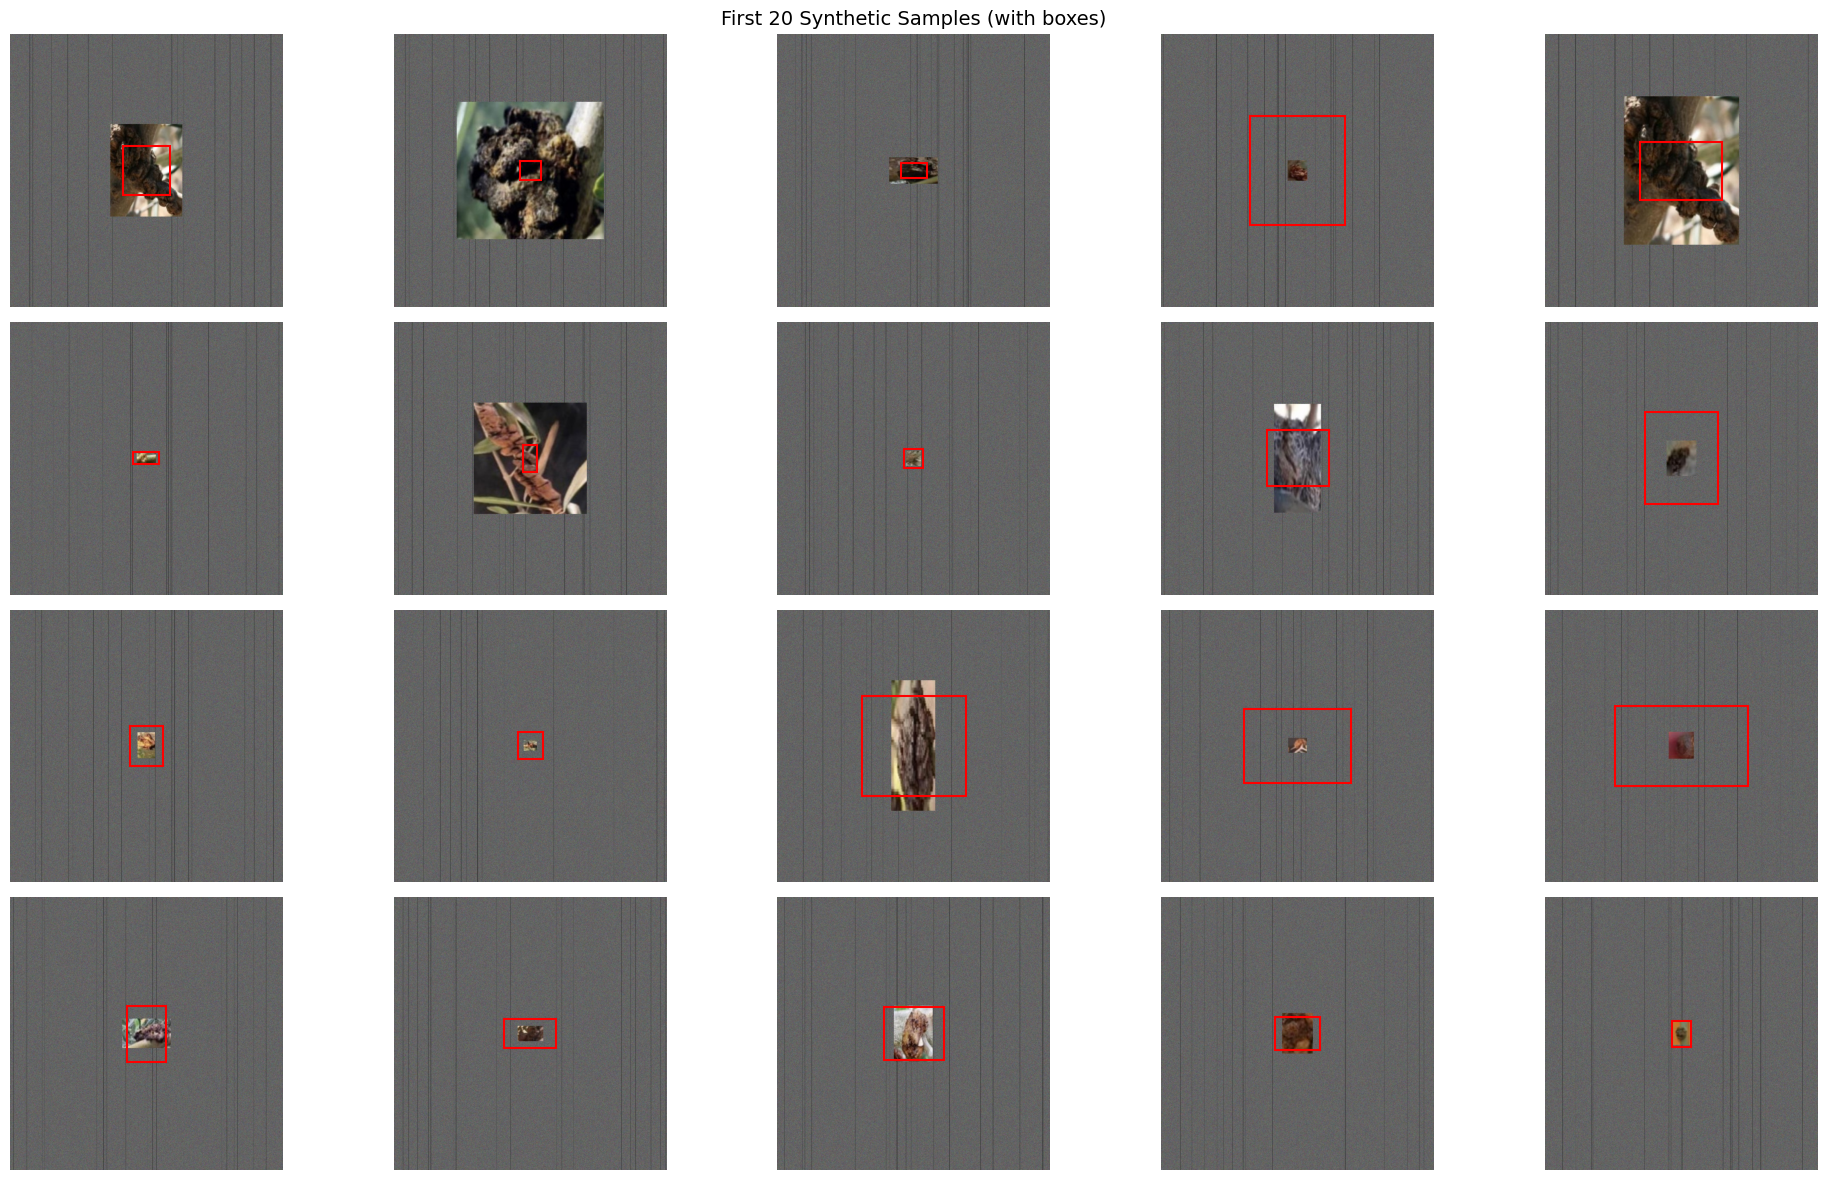

In [48]:
# visualize_20_synthetic.py
import matplotlib.pyplot as plt
from pathlib import Path

SYN_IMGS = Path('/kaggle/working/synthetic/images')
SYN_LBLS = Path('/kaggle/working/synthetic/labels')

# pick first 20 synthetic pairs
pairs = list(zip(SYN_IMGS.glob('*.jpg'), SYN_LBLS.glob('*.txt')))[:20]

fig, axes = plt.subplots(4, 5, figsize=(20, 12))
axes = axes.flatten()

for ax, (img_path, lbl_path) in zip(axes, pairs):
    # load image
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.axis('off')

    # draw boxes (xywh → xyxy)
    h, w, _ = img.shape
    for line in lbl_path.read_text().splitlines():
        cls, cx, cy, bw, bh = map(float, line.strip().split())
        x1 = int((cx - bw/2) * w)
        y1 = int((cy - bh/2) * h)
        x2 = int((cx + bw/2) * w)
        y2 = int((cy + bh/2) * h)
        ax.add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1,
                                   linewidth=1.5, edgecolor='red', facecolor='none'))

fig.suptitle('First 20 Synthetic Samples (with boxes)', fontsize=14)
plt.tight_layout()
plt.show()

In [50]:
yaml_path = Path('/kaggle/working/data__with__synth.yaml')
config = {
    'path': '/kaggle',
    'train': [
        'input/knotsdetection1/train/images',
        'working/synthetic/images'
    ],
    'val': 'input/knotsdetection1/train/images',
    'test': 'input/knotsdetection1/test/images',
    'nc': 1,
    'names': ['olive_knot']
}
with open(yaml_path, 'w') as f:
    yaml.dump(config, f, sort_keys=False)
print(f"✅ YAML file written to {yaml_path}")

✅ YAML file written to /kaggle/working/data__with__synth.yaml


# TRAINING MODEL WITH THE NEW DATA

In [51]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.train(
    data='/kaggle/working/data__with__synth.yaml',
    epochs=150,
    imgsz=640,
    patience=40,
    dropout=0.5,
    lr0=1e-3,
    weight_decay=1e-3,
    mixup=0.3,
    close_mosaic=15,
    project='runs',
    name='with_synth_fixed',
    exist_ok=True,
    verbose=True
)

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=15, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data__with__synth.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.5, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.3, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=with_synth_fixed, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=40, perspective=0.0, plots=True, 

train: Scanning /kaggle/input/knotsdetection1/train/labels... 473 images, 0 backgrounds, 0 corrupt: 100%|██████████| 473/473 [00:00<00:00, 960.47it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/knotsdetection1/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 60.2±23.7 MB/s, size: 39.8 KB)


val: Scanning /kaggle/input/knotsdetection1/train/labels... 173 images, 0 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<00:00, 1083.61it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/knotsdetection1/train is not writeable, cache not saved.


Plotting labels to runs/with_synth_fixed/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/with_synth_fixed
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.25G      1.576      2.546      1.584         33        640: 100%|██████████| 30/30 [00:06<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.12it/s]

                   all        173        607    0.00892      0.763      0.161     0.0519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.42G      1.557      1.903      1.518         34        640: 100%|██████████| 30/30 [00:05<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.83it/s]

                   all        173        607      0.351      0.089      0.114     0.0333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.42G      1.529      1.839      1.526         18        640: 100%|██████████| 30/30 [00:05<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.89it/s]

                   all        173        607      0.147     0.0939     0.0366    0.00835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      2.42G      1.636      1.825      1.581         34        640: 100%|██████████| 30/30 [00:05<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.01it/s]

                   all        173        607      0.242      0.165      0.116     0.0306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      2.42G      1.619      1.757      1.591         37        640: 100%|██████████| 30/30 [00:05<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.12it/s]

                   all        173        607       0.22      0.326      0.142     0.0431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.42G       1.48      1.537      1.489         57        640: 100%|██████████| 30/30 [00:05<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.55it/s]

                   all        173        607       0.39      0.351      0.306     0.0951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.42G      1.463      1.499       1.46         45        640: 100%|██████████| 30/30 [00:05<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.05it/s]

                   all        173        607      0.504      0.458      0.447      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      2.44G      1.548      1.495      1.515         31        640: 100%|██████████| 30/30 [00:05<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.35it/s]

                   all        173        607      0.415      0.455      0.399      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.46G      1.505      1.466      1.499         37        640: 100%|██████████| 30/30 [00:05<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.91it/s]

                   all        173        607      0.463      0.458      0.407      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      2.47G      1.444      1.477      1.466         36        640: 100%|██████████| 30/30 [00:05<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.55it/s]

                   all        173        607      0.358      0.397      0.325       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.49G      1.487      1.426      1.482         51        640: 100%|██████████| 30/30 [00:05<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.14it/s]

                   all        173        607        0.4      0.461      0.384      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.51G      1.394      1.293      1.399         22        640: 100%|██████████| 30/30 [00:05<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.98it/s]

                   all        173        607      0.517      0.509        0.5      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.53G      1.443      1.353      1.469         53        640: 100%|██████████| 30/30 [00:05<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.26it/s]

                   all        173        607      0.447      0.445      0.419      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.54G      1.428      1.387      1.491         51        640: 100%|██████████| 30/30 [00:05<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.33it/s]

                   all        173        607       0.48      0.468      0.432      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.56G      1.463      1.408      1.508         34        640: 100%|██████████| 30/30 [00:05<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.05it/s]

                   all        173        607      0.591        0.5      0.546      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      2.58G      1.387      1.349      1.452         38        640: 100%|██████████| 30/30 [00:05<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.17it/s]

                   all        173        607       0.54      0.445      0.472      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.59G        1.4      1.308      1.447         25        640: 100%|██████████| 30/30 [00:05<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.43it/s]

                   all        173        607      0.496      0.372      0.352      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.61G      1.412      1.303      1.444         28        640: 100%|██████████| 30/30 [00:05<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.21it/s]

                   all        173        607      0.404      0.479      0.372      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.63G      1.335      1.286       1.41         41        640: 100%|██████████| 30/30 [00:05<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.83it/s]

                   all        173        607      0.576      0.539      0.558      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.65G      1.378      1.282      1.437         25        640: 100%|██████████| 30/30 [00:05<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.29it/s]

                   all        173        607      0.631      0.509      0.563       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.66G      1.254      1.173      1.363         25        640: 100%|██████████| 30/30 [00:05<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.56it/s]

                   all        173        607       0.58      0.532      0.542      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.68G      1.294      1.212      1.379         26        640: 100%|██████████| 30/30 [00:05<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.31it/s]

                   all        173        607      0.683      0.544      0.603      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150       2.7G      1.328      1.262      1.413         31        640: 100%|██████████| 30/30 [00:05<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.28it/s]

                   all        173        607      0.534      0.496      0.507        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      2.71G      1.319      1.213      1.414         42        640: 100%|██████████| 30/30 [00:06<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.46it/s]

                   all        173        607      0.613      0.533      0.576       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.73G      1.315      1.244       1.39         36        640: 100%|██████████| 30/30 [00:05<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.71it/s]

                   all        173        607      0.609       0.55      0.578      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.75G      1.439      1.266      1.467         41        640: 100%|██████████| 30/30 [00:05<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.32it/s]

                   all        173        607      0.673      0.584      0.655      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.77G      1.377       1.24      1.424         42        640: 100%|██████████| 30/30 [00:05<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.20it/s]

                   all        173        607       0.63       0.57      0.601      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.78G      1.276      1.169       1.37         18        640: 100%|██████████| 30/30 [00:05<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.43it/s]

                   all        173        607      0.587      0.583      0.593      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150       2.8G      1.307      1.179      1.408         29        640: 100%|██████████| 30/30 [00:05<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.14it/s]

                   all        173        607      0.564      0.599      0.617      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.82G      1.317      1.237      1.399         31        640: 100%|██████████| 30/30 [00:05<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.27it/s]

                   all        173        607       0.65      0.577       0.62      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.83G      1.278       1.14      1.369         46        640: 100%|██████████| 30/30 [00:05<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.19it/s]

                   all        173        607      0.658      0.545      0.609      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.85G      1.302      1.169      1.393         31        640: 100%|██████████| 30/30 [00:05<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.36it/s]

                   all        173        607      0.653      0.593      0.646      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.87G      1.303      1.154      1.386         38        640: 100%|██████████| 30/30 [00:05<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.93it/s]

                   all        173        607      0.673      0.619      0.683      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.88G      1.217      1.109      1.327         34        640: 100%|██████████| 30/30 [00:05<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.22it/s]

                   all        173        607       0.65      0.644      0.665       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150       2.9G      1.221      1.077      1.341         33        640: 100%|██████████| 30/30 [00:05<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.30it/s]

                   all        173        607      0.644      0.619      0.666      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.92G      1.261      1.097      1.353         29        640: 100%|██████████| 30/30 [00:05<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.40it/s]

                   all        173        607      0.652      0.629      0.665      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.94G      1.214      1.068      1.344         43        640: 100%|██████████| 30/30 [00:05<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.56it/s]

                   all        173        607      0.671      0.624      0.674      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      2.95G       1.22      1.122      1.347         22        640: 100%|██████████| 30/30 [00:06<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.24it/s]

                   all        173        607      0.643      0.535      0.591      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      2.97G      1.229      1.095      1.353         40        640: 100%|██████████| 30/30 [00:05<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.18it/s]

                   all        173        607      0.714      0.605      0.669      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      2.99G      1.199      1.024       1.32         33        640: 100%|██████████| 30/30 [00:05<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.45it/s]

                   all        173        607      0.715      0.603      0.701      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150         3G      1.211       1.06      1.335         28        640: 100%|██████████| 30/30 [00:05<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.52it/s]

                   all        173        607      0.724      0.643       0.71      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      3.02G      1.195       1.04      1.313         32        640: 100%|██████████| 30/30 [00:05<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.75it/s]

                   all        173        607      0.702      0.616      0.673      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      3.04G      1.253       1.03      1.341         34        640: 100%|██████████| 30/30 [00:05<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.08it/s]

                   all        173        607      0.677      0.618      0.675      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      3.06G      1.197      1.001      1.321         29        640: 100%|██████████| 30/30 [00:05<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.28it/s]

                   all        173        607      0.717      0.621        0.7      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      3.07G      1.177      1.024      1.314         42        640: 100%|██████████| 30/30 [00:05<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.51it/s]

                   all        173        607      0.654      0.638       0.69      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      3.09G      1.205      1.016       1.32         27        640: 100%|██████████| 30/30 [00:05<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.01it/s]

                   all        173        607      0.745      0.678      0.751      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      3.11G      1.222      1.041      1.346         16        640: 100%|██████████| 30/30 [00:06<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.43it/s]

                   all        173        607      0.683      0.675       0.72      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      3.12G      1.249      1.079      1.358         30        640: 100%|██████████| 30/30 [00:05<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.63it/s]

                   all        173        607      0.702      0.692      0.739       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      3.14G      1.143      1.005      1.304         17        640: 100%|██████████| 30/30 [00:05<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.11it/s]

                   all        173        607      0.717      0.608       0.72      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      3.16G      1.227      1.049      1.353         41        640: 100%|██████████| 30/30 [00:05<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.57it/s]

                   all        173        607      0.702      0.695      0.749      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      3.18G      1.174     0.9762      1.313         44        640: 100%|██████████| 30/30 [00:05<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.20it/s]

                   all        173        607      0.709       0.65      0.728      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      3.19G      1.205      1.019       1.34         33        640: 100%|██████████| 30/30 [00:05<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.27it/s]

                   all        173        607      0.669      0.697      0.743       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      3.21G      1.164     0.9887      1.316         40        640: 100%|██████████| 30/30 [00:05<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.13it/s]

                   all        173        607      0.714      0.662      0.727      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      3.23G      1.238      1.031      1.345         27        640: 100%|██████████| 30/30 [00:05<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.69it/s]

                   all        173        607      0.697      0.718       0.77      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      3.24G       1.15     0.9437      1.295         48        640: 100%|██████████| 30/30 [00:05<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.15it/s]

                   all        173        607      0.773      0.702      0.793      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      3.26G      1.115     0.9404      1.274         29        640: 100%|██████████| 30/30 [00:05<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.34it/s]

                   all        173        607      0.729      0.709      0.776      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      3.28G      1.168     0.9372      1.316         33        640: 100%|██████████| 30/30 [00:05<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.39it/s]

                   all        173        607      0.797      0.681      0.803      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      3.29G      1.169     0.9695      1.321         41        640: 100%|██████████| 30/30 [00:05<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.40it/s]

                   all        173        607      0.766      0.692      0.791       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      3.31G      1.157     0.9768      1.303         38        640: 100%|██████████| 30/30 [00:05<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.40it/s]

                   all        173        607      0.758       0.72      0.794      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      3.33G      1.169      1.001       1.31         24        640: 100%|██████████| 30/30 [00:05<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.27it/s]

                   all        173        607      0.738      0.676      0.756      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      3.35G      1.178     0.9687      1.293         33        640: 100%|██████████| 30/30 [00:05<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.42it/s]

                   all        173        607      0.732      0.707      0.763      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      3.36G       1.17     0.9629      1.328         38        640: 100%|██████████| 30/30 [00:05<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.24it/s]

                   all        173        607      0.788        0.7      0.798      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      3.38G      1.186      0.989       1.32         23        640: 100%|██████████| 30/30 [00:05<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.15it/s]

                   all        173        607      0.702      0.695      0.755      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150       3.4G      1.162     0.9559      1.286         35        640: 100%|██████████| 30/30 [00:05<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.43it/s]

                   all        173        607      0.744      0.709      0.776      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      3.41G      1.149     0.9563      1.288         31        640: 100%|██████████| 30/30 [00:05<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.35it/s]

                   all        173        607       0.77      0.741      0.811      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      3.43G      1.149     0.9773      1.292         19        640: 100%|██████████| 30/30 [00:05<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.35it/s]

                   all        173        607      0.779      0.722      0.827      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      3.45G      1.187     0.9877      1.318         16        640: 100%|██████████| 30/30 [00:05<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.31it/s]

                   all        173        607       0.75      0.806      0.848      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      3.47G      1.184     0.9474      1.296         35        640: 100%|██████████| 30/30 [00:05<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.50it/s]

                   all        173        607      0.798      0.787      0.856      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      3.48G      1.141      0.937      1.288         32        640: 100%|██████████| 30/30 [00:05<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.34it/s]

                   all        173        607      0.802      0.769      0.849      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150       3.5G      1.105     0.9187      1.275         39        640: 100%|██████████| 30/30 [00:05<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.70it/s]

                   all        173        607      0.792      0.753      0.837      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      3.52G       1.17      0.954       1.31         22        640: 100%|██████████| 30/30 [00:05<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.22it/s]

                   all        173        607      0.776      0.748      0.826      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      3.53G      1.161     0.9545      1.304         37        640: 100%|██████████| 30/30 [00:05<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.41it/s]

                   all        173        607      0.774       0.74      0.832      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      3.55G      1.169     0.9743      1.313         46        640: 100%|██████████| 30/30 [00:05<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.10it/s]

                   all        173        607      0.784      0.768      0.843      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      3.57G       1.15      0.934      1.288         27        640: 100%|██████████| 30/30 [00:05<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.54it/s]

                   all        173        607      0.819      0.788      0.868       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      3.59G      1.094     0.8816      1.241         33        640: 100%|██████████| 30/30 [00:05<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.53it/s]

                   all        173        607      0.785      0.787       0.84      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150       3.6G      1.063      0.873      1.247         34        640: 100%|██████████| 30/30 [00:05<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.58it/s]

                   all        173        607      0.812      0.809      0.874      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      3.62G      1.041      0.873      1.265         15        640: 100%|██████████| 30/30 [00:05<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.61it/s]

                   all        173        607        0.8       0.81      0.871      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      3.64G      1.098     0.9081      1.258         37        640: 100%|██████████| 30/30 [00:05<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.45it/s]

                   all        173        607      0.812      0.784       0.86      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      3.65G      1.092     0.8664      1.247         36        640: 100%|██████████| 30/30 [00:05<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.26it/s]

                   all        173        607      0.834       0.82      0.874      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      3.67G      1.057     0.8592      1.233         54        640: 100%|██████████| 30/30 [00:05<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.17it/s]

                   all        173        607      0.834      0.824      0.892      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      3.69G      0.994     0.7883      1.194         29        640: 100%|██████████| 30/30 [00:05<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.46it/s]

                   all        173        607      0.836      0.778      0.873      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      3.71G      1.053      0.832       1.23         33        640: 100%|██████████| 30/30 [00:05<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.38it/s]

                   all        173        607      0.796      0.806      0.873      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      3.72G      1.113     0.8765      1.272         30        640: 100%|██████████| 30/30 [00:05<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.30it/s]

                   all        173        607      0.811      0.842       0.88      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      3.74G      1.031     0.8305      1.222         40        640: 100%|██████████| 30/30 [00:05<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.71it/s]

                   all        173        607       0.84      0.815      0.883      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      3.76G      1.068     0.8299      1.232         29        640: 100%|██████████| 30/30 [00:05<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.33it/s]

                   all        173        607      0.835      0.784      0.877       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      3.77G      1.088     0.8789      1.241         29        640: 100%|██████████| 30/30 [00:05<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.45it/s]

                   all        173        607      0.813      0.842      0.888        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      3.79G      1.011     0.7991      1.191         51        640: 100%|██████████| 30/30 [00:05<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.67it/s]

                   all        173        607      0.845      0.792      0.882      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      3.81G      1.008     0.8095      1.205         23        640: 100%|██████████| 30/30 [00:05<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.52it/s]

                   all        173        607       0.85      0.822      0.897      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      3.82G     0.9865     0.8025      1.198         47        640: 100%|██████████| 30/30 [00:05<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.23it/s]

                   all        173        607      0.841      0.848      0.907       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      3.84G      1.027      0.834      1.216         44        640: 100%|██████████| 30/30 [00:05<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.42it/s]

                   all        173        607      0.819      0.829      0.889      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      3.86G     0.9995     0.8029      1.204         36        640: 100%|██████████| 30/30 [00:05<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.49it/s]

                   all        173        607      0.834      0.838      0.896      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      3.88G      1.033     0.8051      1.232         43        640: 100%|██████████| 30/30 [00:05<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.36it/s]

                   all        173        607      0.835      0.837      0.907      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      3.89G      1.059      0.833      1.233         34        640: 100%|██████████| 30/30 [00:05<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.02it/s]

                   all        173        607      0.855      0.829      0.904      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      3.91G       1.02     0.8171      1.212         30        640: 100%|██████████| 30/30 [00:05<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.78it/s]

                   all        173        607      0.837      0.867      0.919      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      3.93G     0.9521     0.7605      1.161         49        640: 100%|██████████| 30/30 [00:05<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.48it/s]

                   all        173        607      0.858      0.856      0.917      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      3.94G      1.045     0.8306      1.229         26        640: 100%|██████████| 30/30 [00:05<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.57it/s]

                   all        173        607       0.86      0.862      0.922      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      3.96G     0.9976     0.7721      1.201         46        640: 100%|██████████| 30/30 [00:05<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.48it/s]

                   all        173        607      0.887      0.855      0.924      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      3.98G     0.9916     0.7804      1.196         50        640: 100%|██████████| 30/30 [00:06<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.31it/s]

                   all        173        607      0.853      0.855      0.915      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      3.99G     0.9711     0.7792      1.202         39        640: 100%|██████████| 30/30 [00:05<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.37it/s]

                   all        173        607      0.852      0.853      0.922      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      4.01G     0.9712     0.7899      1.189         22        640: 100%|██████████| 30/30 [00:05<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.75it/s]

                   all        173        607      0.863      0.873      0.925      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      4.03G     0.9672     0.7443      1.188         16        640: 100%|██████████| 30/30 [00:05<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.64it/s]

                   all        173        607      0.854      0.865      0.925      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      4.05G     0.9643     0.7674      1.173         34        640: 100%|██████████| 30/30 [00:05<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.49it/s]

                   all        173        607      0.839      0.893      0.921      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      4.06G      1.071     0.8058      1.227         46        640: 100%|██████████| 30/30 [00:05<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.18it/s]

                   all        173        607      0.892      0.858      0.935      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      4.08G      1.004     0.7826      1.203         31        640: 100%|██████████| 30/30 [00:05<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.56it/s]

                   all        173        607      0.849      0.889      0.935      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150       4.1G     0.9882     0.7844      1.206         29        640: 100%|██████████| 30/30 [00:05<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.21it/s]

                   all        173        607      0.887      0.873      0.936      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      4.12G     0.9799     0.7863      1.181         40        640: 100%|██████████| 30/30 [00:05<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.36it/s]

                   all        173        607      0.893      0.863      0.939      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      4.13G     0.9678     0.7471      1.172         35        640: 100%|██████████| 30/30 [00:05<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.85it/s]

                   all        173        607      0.883       0.87      0.938       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      4.15G     0.9415     0.7328      1.166         47        640: 100%|██████████| 30/30 [00:05<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.47it/s]

                   all        173        607      0.892      0.854      0.937      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      4.17G      1.012     0.8099      1.202         28        640: 100%|██████████| 30/30 [00:05<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.41it/s]

                   all        173        607      0.872      0.875      0.943      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      4.18G     0.9562     0.7681      1.178         26        640: 100%|██████████| 30/30 [00:05<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.64it/s]

                   all        173        607      0.873      0.881      0.942      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150       4.2G     0.9491     0.7575       1.17         34        640: 100%|██████████| 30/30 [00:05<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.61it/s]

                   all        173        607      0.879       0.87      0.948      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      4.22G      0.948      0.754      1.161         27        640: 100%|██████████| 30/30 [00:05<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.44it/s]

                   all        173        607      0.875      0.897      0.943      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      4.23G     0.9211     0.7153      1.152         23        640: 100%|██████████| 30/30 [00:05<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.38it/s]

                   all        173        607      0.875      0.891      0.944      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      4.25G     0.9826     0.7821      1.191         50        640: 100%|██████████| 30/30 [00:05<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.31it/s]

                   all        173        607      0.908      0.895      0.953       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      4.27G     0.9571     0.7526      1.171         34        640: 100%|██████████| 30/30 [00:05<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.28it/s]

                   all        173        607      0.894      0.887       0.95      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      4.29G     0.9297     0.7385      1.162         42        640: 100%|██████████| 30/30 [00:05<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.18it/s]

                   all        173        607      0.891        0.9      0.954      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150       4.3G     0.8867     0.6955      1.134         53        640: 100%|██████████| 30/30 [00:05<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.33it/s]

                   all        173        607      0.892      0.895      0.952      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      4.32G     0.9278     0.7278      1.166         37        640: 100%|██████████| 30/30 [00:05<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.28it/s]

                   all        173        607      0.889      0.919      0.956      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      4.34G     0.9028     0.6943      1.154         38        640: 100%|██████████| 30/30 [00:05<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.55it/s]

                   all        173        607      0.928      0.903      0.964      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      4.35G     0.9142      0.703      1.139         33        640: 100%|██████████| 30/30 [00:05<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.56it/s]

                   all        173        607      0.893      0.929      0.968      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      4.37G     0.9452     0.7209      1.164         28        640: 100%|██████████| 30/30 [00:05<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.70it/s]

                   all        173        607       0.92      0.912      0.966      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      4.39G      0.869     0.6732       1.14         17        640: 100%|██████████| 30/30 [00:05<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.21it/s]

                   all        173        607      0.907      0.916      0.963      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150       4.4G     0.9284     0.7112      1.158         46        640: 100%|██████████| 30/30 [00:05<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.41it/s]

                   all        173        607      0.885      0.935      0.963      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      4.42G     0.9145     0.7156      1.152         66        640: 100%|██████████| 30/30 [00:05<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.37it/s]

                   all        173        607       0.89      0.924      0.964      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      4.44G     0.8902     0.6775      1.125         27        640: 100%|██████████| 30/30 [00:05<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.63it/s]

                   all        173        607       0.89      0.914      0.963       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      4.46G     0.9321     0.7103      1.161         29        640: 100%|██████████| 30/30 [00:05<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.66it/s]

                   all        173        607      0.881      0.905      0.962      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      4.47G     0.9263     0.7121      1.149         62        640: 100%|██████████| 30/30 [00:05<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.43it/s]

                   all        173        607      0.924      0.901      0.968      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      4.49G     0.8689      0.679      1.123         31        640: 100%|██████████| 30/30 [00:05<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.56it/s]

                   all        173        607      0.911      0.923      0.971      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      4.51G     0.9249     0.6895      1.147         42        640: 100%|██████████| 30/30 [00:05<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.22it/s]

                   all        173        607      0.909       0.92      0.969      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      4.52G     0.8963      0.693      1.145         25        640: 100%|██████████| 30/30 [00:05<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.39it/s]

                   all        173        607      0.929      0.906       0.97      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      4.54G      0.851     0.6617      1.105         28        640: 100%|██████████| 30/30 [00:05<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.06it/s]

                   all        173        607      0.923      0.904      0.971      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      4.56G     0.8876     0.7026      1.141         38        640: 100%|██████████| 30/30 [00:05<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.61it/s]

                   all        173        607      0.902      0.929      0.968      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      4.58G      0.888     0.6713      1.137         36        640: 100%|██████████| 30/30 [00:05<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.18it/s]

                   all        173        607      0.911      0.919      0.971      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      4.59G     0.8768     0.6683      1.141         30        640: 100%|██████████| 30/30 [00:05<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.13it/s]

                   all        173        607      0.912      0.934      0.972      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      4.61G     0.9006     0.6807      1.138         38        640: 100%|██████████| 30/30 [00:05<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.15it/s]

                   all        173        607      0.921      0.921      0.974      0.677


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      4.63G      0.747     0.5206      1.053         12        640: 100%|██████████| 30/30 [00:05<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.01it/s]

                   all        173        607      0.919      0.939      0.973      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      4.64G     0.7522     0.5032      1.047         16        640: 100%|██████████| 30/30 [00:04<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.72it/s]

                   all        173        607       0.93      0.937      0.976      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      4.66G     0.7489     0.5046      1.054         19        640: 100%|██████████| 30/30 [00:04<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.93it/s]

                   all        173        607      0.903      0.948      0.977      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      4.68G     0.6995     0.4662      1.017         13        640: 100%|██████████| 30/30 [00:04<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.64it/s]

                   all        173        607      0.927      0.942      0.978      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150       4.7G     0.7166     0.4788      1.031         20        640: 100%|██████████| 30/30 [00:04<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.90it/s]

                   all        173        607      0.932      0.952       0.98       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      4.71G     0.7061     0.4568      1.029         14        640: 100%|██████████| 30/30 [00:04<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:00<00:00,  6.12it/s]

                   all        173        607      0.927      0.956       0.98      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      4.73G     0.6621     0.4479      1.001         14        640: 100%|██████████| 30/30 [00:04<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.27it/s]

                   all        173        607      0.932      0.951      0.981      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      4.75G     0.6714      0.445      0.999         12        640: 100%|██████████| 30/30 [00:04<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.85it/s]

                   all        173        607      0.934      0.957      0.983      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      4.76G      0.678     0.4497      1.015         15        640: 100%|██████████| 30/30 [00:04<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.91it/s]

                   all        173        607      0.927      0.964      0.984      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      4.78G     0.6815     0.4392      1.003         19        640: 100%|██████████| 30/30 [00:04<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.69it/s]

                   all        173        607      0.931      0.963      0.984      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150       4.8G     0.6575     0.4276     0.9984         15        640: 100%|██████████| 30/30 [00:04<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.89it/s]

                   all        173        607      0.933      0.961      0.984       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      4.81G     0.6738     0.4378      1.001         18        640: 100%|██████████| 30/30 [00:04<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.69it/s]

                   all        173        607      0.938      0.964      0.985      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      4.83G     0.6705     0.4366      1.008         18        640: 100%|██████████| 30/30 [00:04<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.58it/s]

                   all        173        607      0.938      0.965      0.985      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      4.85G     0.6449     0.4173     0.9861         18        640: 100%|██████████| 30/30 [00:04<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.98it/s]

                   all        173        607      0.929      0.969      0.985      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      4.87G     0.6626     0.4441      1.004         18        640: 100%|██████████| 30/30 [00:04<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.76it/s]

                   all        173        607      0.933      0.968      0.985      0.736



150 epochs completed in 0.287 hours.
Optimizer stripped from runs/with_synth_fixed/weights/last.pt, 6.3MB
Optimizer stripped from runs/with_synth_fixed/weights/best.pt, 6.3MB

Validating runs/with_synth_fixed/weights/best.pt...
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.61it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        173        607       0.93      0.966      0.985      0.736
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/with_synth_fixed


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dbf451e4fd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# inference_comparison.py
# Standalone script to compare inference results between original and synthetic-augmented models

from ultralytics import YOLO
from pathlib import Path
import cv2

# Paths to the best weights from your training runs
WEIGHTS_DIR = Path('/kaggle/working')  # adjust if different
ORIG_WEIGHTS = WEIGHTS_DIR / 'runs' / 'knots_orig' / 'weights' / 'best.pt'
SYN_WEIGHTS  = WEIGHTS_DIR / 'runs' / 'knots_with_synth' / 'weights' / 'best.pt'

# Directory of test images
TEST_DIR = Path('/kaggle/input/knotsdetection1/test/images')

# Output directories
OUT_DIR = Path('/kaggle/working/inference_comparison')
(OUT_DIR / 'orig').mkdir(parents=True, exist_ok=True)
(OUT_DIR / 'synth').mkdir(parents=True, exist_ok=True)

# Load models
model_orig = YOLO(str(ORIG_WEIGHTS))
model_synth = YOLO(str(SYN_WEIGHTS))

# Run inference on each test image, save side-by-side results
for img_path in TEST_DIR.glob('*.jpg'):
    img = str(img_path)
    # Original-model inference
    res_orig = model_orig.predict(source=img, save=False)
    boxes_o = res_orig[0].boxes
n    # Synthetic-model inference
    res_synth = model_synth.predict(source=img, save=False)
    boxes_s = res_synth[0].boxes

    # Load original image to draw
    frame = cv2.imread(img)

    # Draw boxes for original model (in green)
    for box in boxes_o.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.imwrite(str(OUT_DIR / 'orig' / img_path.name), frame)

    # Reload for clear overlay, draw synthetic model boxes (in blue)
    frame2 = cv2.imread(img)
    for box in boxes_s.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(frame2, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.imwrite(str(OUT_DIR / 'synth' / img_path.name), frame2)

print(f"✅ Inference completed. Results saved to {OUT_DIR}/orig and {OUT_DIR}/synth")

In [55]:
# test_mAP_report.py
from ultralytics import YOLO
from pathlib import Path

# choose the checkpoint you want to evaluate
CKPT = Path('/kaggle/working/runs/with_synth_fixed/weights/best.pt')   # or 'runs/with_synthetic/weights/best.pt'

model = YOLO(CKPT)

# official evaluation on the untouched 50-image test set
metrics = model.val(
    data='/kaggle/working/data__with__synth.yaml',   # same yaml used during training
    split='test',
    imgsz=640,
    conf=0.001,
    iou=0.5,
    verbose=True
)

print('\n========== FINAL TEST-SET METRICS ==========')
print(f'mAP@0.50     : {metrics.box.map50:.4f}')
print(f'mAP@0.50:0.95: {metrics.box.map:.4f}')
print(f'Precision    : {metrics.box.mp:.4f}')
print(f'Recall       : {metrics.box.mr:.4f}')
print('Done.')

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 2.1±0.3 ms, read: 90.7±30.8 MB/s, size: 51.1 KB)


val: Scanning /kaggle/input/knotsdetection1/test/labels... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 465.46it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/knotsdetection1/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         50        184      0.486      0.315       0.32       0.11
Speed: 6.4ms preprocess, 14.6ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val4

========== FINAL TEST-SET METRICS ==========
mAP@0.50     : 0.3202
mAP@0.50:0.95: 0.1102
Precision    : 0.4860
Recall       : 0.3152
Done.


**STILL BAD PERFORMANCE SO MOVING ON TO FREEZING LAYERS**

In [ ]:
from ultralytics import YOLO

# load your pretrained model
model = YOLO('yolov8s.pt')

# freeze the first 10 layers (the entire backbone)
model.train(
    data='data__with__synth.yaml',
    epochs=50,
    imgsz=640,
    freeze=10,          # <-- freeze backbone
    name='knots_frozen'
)

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data__with__synth.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=knots_frozen, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=

train: Scanning /kaggle/input/knotsdetection1/train/labels... 473 images, 0 backgrounds, 0 corrupt: 100%|██████████| 473/473 [00:00<00:00, 860.29it/s] 

WARNING ⚠️ train: Cache directory /kaggle/input/knotsdetection1/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 40.2±27.8 MB/s, size: 39.8 KB)


val: Scanning /kaggle/input/knotsdetection1/train/labels... 173 images, 0 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<00:00, 1070.61it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/knotsdetection1/train is not writeable, cache not saved.


Plotting labels to runs/detect/knots_frozen/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/knots_frozen
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.94G      1.445      2.509        1.5         39        640: 100%|██████████| 30/30 [00:05<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.60it/s]

                   all        173        607      0.422      0.437      0.363      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.7G       1.49      1.598      1.523         52        640: 100%|██████████| 30/30 [00:05<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]

                   all        173        607      0.351      0.482      0.341      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.7G      1.467      1.445      1.481         20        640: 100%|██████████| 30/30 [00:05<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]

                   all        173        607       0.11      0.474     0.0842     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.7G      1.337      1.154      1.388         30        640: 100%|██████████| 30/30 [00:05<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]

                   all        173        607      0.232      0.236       0.16      0.053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       2.7G      1.487       1.26        1.5         25        640: 100%|██████████| 30/30 [00:05<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all        173        607      0.538      0.479      0.469       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       2.7G       1.42      1.099      1.445         46        640: 100%|██████████| 30/30 [00:05<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.94it/s]

                   all        173        607      0.407      0.509      0.406      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       2.7G      1.359      1.071      1.399         35        640: 100%|██████████| 30/30 [00:05<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all        173        607        0.6      0.612      0.609      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.7G      1.291      1.015      1.371         24        640: 100%|██████████| 30/30 [00:05<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]

                   all        173        607      0.616      0.589      0.631      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.7G      1.351       1.04      1.378         24        640: 100%|██████████| 30/30 [00:05<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]

                   all        173        607      0.622      0.638      0.652      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.7G       1.28      0.981       1.33         40        640: 100%|██████████| 30/30 [00:05<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.09it/s]

                   all        173        607      0.667      0.653      0.698      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.73G      1.267     0.9723       1.33         34        640: 100%|██████████| 30/30 [00:05<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.90it/s]

                   all        173        607      0.674      0.657      0.706      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.76G      1.282     0.9742      1.338         22        640: 100%|██████████| 30/30 [00:05<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]

                   all        173        607      0.738      0.705      0.774      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.78G      1.223     0.9492      1.318         40        640: 100%|██████████| 30/30 [00:05<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.08it/s]

                   all        173        607      0.705      0.713      0.749      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.81G      1.199     0.9158      1.293         40        640: 100%|██████████| 30/30 [00:05<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.06it/s]

                   all        173        607      0.717      0.759      0.789      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.83G      1.168     0.8565      1.311         17        640: 100%|██████████| 30/30 [00:05<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]

                   all        173        607      0.729       0.71      0.741      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.86G      1.189     0.8641      1.294         37        640: 100%|██████████| 30/30 [00:05<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.91it/s]

                   all        173        607      0.735      0.758      0.813       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.89G      1.272     0.9085      1.319         22        640: 100%|██████████| 30/30 [00:05<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]

                   all        173        607       0.73      0.707      0.766       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.91G      1.081     0.8626      1.223         25        640: 100%|██████████| 30/30 [00:05<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.74it/s]

                   all        173        607      0.777      0.767      0.828      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.94G      1.085     0.8215      1.231         24        640: 100%|██████████| 30/30 [00:05<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all        173        607      0.774      0.771      0.816       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.96G      1.104      0.809      1.232         53        640: 100%|██████████| 30/30 [00:05<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.07it/s]

                   all        173        607      0.821      0.799      0.865      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.99G      1.147     0.8383      1.248         26        640: 100%|██████████| 30/30 [00:05<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.01it/s]

                   all        173        607      0.818      0.779      0.868      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.02G      1.099     0.7727      1.228         26        640: 100%|██████████| 30/30 [00:05<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.01it/s]

                   all        173        607      0.843      0.842      0.894      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.04G      1.061     0.7773      1.213         25        640: 100%|██████████| 30/30 [00:05<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.01it/s]

                   all        173        607      0.823      0.774      0.862      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.07G      1.038     0.7461      1.187         41        640: 100%|██████████| 30/30 [00:05<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.04it/s]

                   all        173        607      0.863      0.814      0.899      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       3.1G      0.997      0.703      1.169         25        640: 100%|██████████| 30/30 [00:05<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.02it/s]

                   all        173        607      0.879      0.811      0.908      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.12G      1.019     0.7102      1.187         15        640: 100%|██████████| 30/30 [00:05<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.18it/s]

                   all        173        607      0.866      0.822      0.914       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.15G      1.061       0.74      1.212         25        640: 100%|██████████| 30/30 [00:05<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]

                   all        173        607      0.897      0.837      0.928      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.17G          1     0.6906      1.191         28        640: 100%|██████████| 30/30 [00:05<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.09it/s]

                   all        173        607      0.907      0.852      0.929       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       3.2G      1.015     0.6827      1.191         25        640: 100%|██████████| 30/30 [00:05<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]

                   all        173        607      0.884       0.87      0.931      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.23G     0.9697     0.6808      1.145         26        640: 100%|██████████| 30/30 [00:05<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.12it/s]

                   all        173        607      0.892      0.881      0.936      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.25G     0.9206     0.6445      1.135         40        640: 100%|██████████| 30/30 [00:05<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.02it/s]

                   all        173        607      0.879      0.888      0.942      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.28G     0.8921     0.6342      1.107         32        640: 100%|██████████| 30/30 [00:05<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.07it/s]

                   all        173        607      0.894      0.889      0.942      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       3.3G     0.9952     0.6755      1.158         33        640: 100%|██████████| 30/30 [00:05<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.07it/s]

                   all        173        607      0.897      0.871      0.941      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.33G      0.926     0.6334      1.118         39        640: 100%|██████████| 30/30 [00:05<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.07it/s]

                   all        173        607      0.906      0.886      0.945      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.36G     0.8768     0.6002      1.099         21        640: 100%|██████████| 30/30 [00:05<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.03it/s]

                   all        173        607      0.905      0.906      0.942      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.38G      0.893     0.6428      1.114         44        640: 100%|██████████| 30/30 [00:05<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.08it/s]

                   all        173        607      0.908      0.891      0.949      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.41G     0.7831     0.5585      1.063         15        640: 100%|██████████| 30/30 [00:05<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.13it/s]

                   all        173        607      0.939      0.881      0.959      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.44G     0.9027     0.6196      1.123         26        640: 100%|██████████| 30/30 [00:05<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]

                   all        173        607      0.948      0.891      0.961      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.46G     0.9237     0.6087      1.118         32        640: 100%|██████████| 30/30 [00:05<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]

                   all        173        607      0.934      0.912      0.961      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.81G     0.8315     0.5933        1.1         29        640: 100%|██████████| 30/30 [00:05<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.02it/s]

                   all        173        607      0.949      0.903      0.963      0.657


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.84G     0.8043     0.5097      1.044         37        640: 100%|██████████| 30/30 [00:06<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.05it/s]

                   all        173        607      0.931      0.916      0.964      0.666


In [56]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

# suppose you want to freeze layers 0–12 by name
freeze_layers = [f'model.{i}.' for i in range(16)]
for name, param in model.model.named_parameters():
    if any(fl in name for fl in freeze_layers):
        param.requires_grad = False
    else:
        param.requires_grad = True

# now train—only unfrozen layers will be updated
model.train(
    data='data__with__synth.yaml',
    epochs=50,
    imgsz=640,
    name='knots_manual_freeze'
)

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data__with__synth.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=knots_manual_freeze, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pr

train: Scanning /kaggle/input/knotsdetection1/train/labels... 473 images, 0 backgrounds, 0 corrupt: 100%|██████████| 473/473 [00:00<00:00, 831.47it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/knotsdetection1/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 52.6±17.9 MB/s, size: 39.8 KB)


val: Scanning /kaggle/input/knotsdetection1/train/labels... 173 images, 0 backgrounds, 0 corrupt: 100%|██████████| 173/173 [00:00<00:00, 918.80it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/knotsdetection1/train is not writeable, cache not saved.


Plotting labels to runs/detect/knots_manual_freeze/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/knots_manual_freeze
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.14G      1.452      2.576      1.531         39        640: 100%|██████████| 30/30 [00:08<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.67it/s]

                   all        173        607       0.44      0.222      0.199     0.0531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.89G      1.535      1.747      1.578         52        640: 100%|██████████| 30/30 [00:08<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.65it/s]

                   all        173        607      0.154      0.189     0.0746     0.0207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.89G      1.537      1.549      1.576         20        640: 100%|██████████| 30/30 [00:08<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.59it/s]

                   all        173        607    0.00779      0.491    0.00609     0.0018



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.89G       1.41      1.413      1.499         30        640: 100%|██████████| 30/30 [00:08<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]

                   all        173        607     0.0732      0.089     0.0213    0.00537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.89G      1.531      1.489      1.571         25        640: 100%|██████████| 30/30 [00:07<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]

                   all        173        607      0.214      0.316      0.152     0.0452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.89G      1.492      1.352      1.556         46        640: 100%|██████████| 30/30 [00:07<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]

                   all        173        607      0.301      0.326      0.223     0.0674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.89G      1.431      1.354      1.542         35        640: 100%|██████████| 30/30 [00:07<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.98it/s]

                   all        173        607      0.187      0.239      0.129     0.0359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.89G      1.378      1.261      1.521         24        640: 100%|██████████| 30/30 [00:07<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.86it/s]

                   all        173        607      0.373      0.332      0.261     0.0761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.92G      1.441      1.315       1.53         24        640: 100%|██████████| 30/30 [00:07<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all        173        607      0.345      0.418      0.332      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.96G      1.339      1.214      1.451         40        640: 100%|██████████| 30/30 [00:07<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]

                   all        173        607      0.351      0.377      0.256     0.0736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.99G       1.33      1.237      1.425         34        640: 100%|██████████| 30/30 [00:07<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]

                   all        173        607      0.494      0.392      0.408      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.03G      1.343      1.153      1.466         22        640: 100%|██████████| 30/30 [00:07<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]

                   all        173        607      0.511      0.516      0.485      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.07G      1.342      1.166      1.434         40        640: 100%|██████████| 30/30 [00:07<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.85it/s]

                   all        173        607      0.458      0.479      0.428      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       5.1G      1.282       1.12      1.385         40        640: 100%|██████████| 30/30 [00:07<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.92it/s]

                   all        173        607      0.545      0.504      0.509      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.14G      1.299      1.125      1.449         17        640: 100%|██████████| 30/30 [00:07<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.04it/s]

                   all        173        607      0.463      0.412      0.395      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.18G      1.302      1.118      1.435         37        640: 100%|██████████| 30/30 [00:07<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]

                   all        173        607      0.535      0.535      0.502      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.21G      1.378      1.141        1.5         22        640: 100%|██████████| 30/30 [00:07<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]

                   all        173        607      0.584      0.529       0.55      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.25G      1.167       1.06      1.357         25        640: 100%|██████████| 30/30 [00:07<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.00it/s]

                   all        173        607      0.506      0.498      0.495      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.28G      1.198      1.061      1.359         24        640: 100%|██████████| 30/30 [00:07<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]

                   all        173        607      0.635      0.514      0.554      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.32G      1.241       1.07      1.393         53        640: 100%|██████████| 30/30 [00:07<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.00it/s]

                   all        173        607      0.651      0.578      0.638      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.36G      1.275      1.087      1.411         26        640: 100%|██████████| 30/30 [00:07<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.70it/s]

                   all        173        607      0.606      0.606       0.64      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.39G      1.196      1.012      1.372         26        640: 100%|██████████| 30/30 [00:07<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.03it/s]

                   all        173        607      0.633      0.567      0.604      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.43G      1.182      1.032      1.366         25        640: 100%|██████████| 30/30 [00:07<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.01it/s]

                   all        173        607      0.617       0.54      0.571      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.47G      1.213     0.9824      1.355         41        640: 100%|██████████| 30/30 [00:07<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.05it/s]

                   all        173        607      0.665      0.616      0.661      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       5.5G      1.181      0.933      1.355         25        640: 100%|██████████| 30/30 [00:07<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]

                   all        173        607      0.662      0.596      0.656      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.54G      1.211     0.9598      1.369         15        640: 100%|██████████| 30/30 [00:07<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.05it/s]

                   all        173        607      0.732      0.577      0.668      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.57G      1.234      1.044      1.387         25        640: 100%|██████████| 30/30 [00:07<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.96it/s]

                   all        173        607      0.691      0.606      0.678      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.61G      1.162     0.9464      1.367         28        640: 100%|██████████| 30/30 [00:07<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.92it/s]

                   all        173        607      0.673      0.577      0.649      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.65G      1.184     0.9657      1.351         25        640: 100%|██████████| 30/30 [00:07<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.02it/s]

                   all        173        607      0.676      0.611      0.684      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.68G      1.174     0.9469       1.34         26        640: 100%|██████████| 30/30 [00:07<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.93it/s]

                   all        173        607       0.65      0.641      0.646      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.72G      1.084     0.8797      1.309         40        640: 100%|██████████| 30/30 [00:07<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.00it/s]

                   all        173        607      0.756      0.659      0.753      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.76G      1.077     0.8818      1.283         32        640: 100%|██████████| 30/30 [00:07<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.00it/s]

                   all        173        607       0.76      0.661      0.728      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.79G      1.184     0.9581      1.351         33        640: 100%|██████████| 30/30 [00:07<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.03it/s]

                   all        173        607      0.729      0.666       0.75      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.83G       1.13     0.8698      1.312         39        640: 100%|██████████| 30/30 [00:07<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.73it/s]

                   all        173        607      0.746      0.703      0.761       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.87G      1.092     0.8354      1.304         21        640: 100%|██████████| 30/30 [00:07<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.08it/s]

                   all        173        607      0.778       0.69      0.789      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       5.9G      1.101     0.8443      1.301         44        640: 100%|██████████| 30/30 [00:07<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]

                   all        173        607      0.776      0.679      0.787       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.94G     0.9833     0.7526      1.246         15        640: 100%|██████████| 30/30 [00:07<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]

                   all        173        607       0.74       0.72      0.761      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.97G      1.098     0.8285        1.3         26        640: 100%|██████████| 30/30 [00:07<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.02it/s]

                   all        173        607      0.774      0.718      0.794      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.01G      1.117     0.8396      1.303         32        640: 100%|██████████| 30/30 [00:07<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.06it/s]

                   all        173        607      0.787      0.745      0.818      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.37G      1.032      0.807      1.273         29        640: 100%|██████████| 30/30 [00:07<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]

                   all        173        607      0.816      0.739       0.81       0.38


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.41G      1.076     0.7866        1.3         37        640: 100%|██████████| 30/30 [00:08<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.02it/s]

                   all        173        607      0.818      0.761      0.824       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.44G      1.038     0.7359      1.302         13        640: 100%|██████████| 30/30 [00:07<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.99it/s]

                   all        173        607       0.81      0.773      0.846      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.48G      1.013     0.7182      1.284          9        640: 100%|██████████| 30/30 [00:07<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.03it/s]

                   all        173        607      0.797      0.778       0.85      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.52G     0.9919     0.6886      1.255         17        640: 100%|██████████| 30/30 [00:07<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.00it/s]

                   all        173        607      0.834      0.779      0.867      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.55G      1.021     0.6785      1.264         23        640: 100%|██████████| 30/30 [00:07<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.00it/s]

                   all        173        607      0.839      0.817      0.885      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.59G     0.9591     0.6664      1.226         32        640: 100%|██████████| 30/30 [00:07<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.08it/s]

                   all        173        607      0.872      0.791      0.887       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.63G     0.9537     0.6575      1.236         14        640: 100%|██████████| 30/30 [00:07<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.87it/s]

                   all        173        607      0.857      0.822      0.895       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.66G     0.9562     0.6574      1.253         15        640: 100%|██████████| 30/30 [00:07<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.05it/s]

                   all        173        607       0.87      0.819      0.899      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       6.7G     0.9645     0.6456      1.245         24        640: 100%|██████████| 30/30 [00:07<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.08it/s]

                   all        173        607      0.857      0.847      0.907      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.73G     0.9508     0.6117      1.235         16        640: 100%|██████████| 30/30 [00:07<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.03it/s]

                   all        173        607      0.875      0.841      0.911      0.492



50 epochs completed in 0.138 hours.
Optimizer stripped from runs/detect/knots_manual_freeze/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/knots_manual_freeze/weights/best.pt, 22.5MB

Validating runs/detect/knots_manual_freeze/weights/best.pt...
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        173        607      0.875       0.84      0.911      0.493
Speed: 0.2ms preprocess, 4.9ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/knots_manual_freeze


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dbf8eb6fa90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

**MANUAL FREEZING**

In [58]:
# test_mAP_report.py
from ultralytics import YOLO
from pathlib import Path

# choose the checkpoint you want to evaluate
CKPT = Path('/kaggle/working/runs/detect/knots_manual_freeze/weights/best.pt')   # or 'runs/with_synthetic/weights/best.pt'

model = YOLO(CKPT)

# official evaluation on the untouched 50-image test set
metrics = model.val(
    data='/kaggle/working/data__with__synth.yaml',   # same yaml used during training
    split='test',
    imgsz=640,
    conf=0.001,
    iou=0.5,
    verbose=True
)

print('\n========== FINAL TEST-SET METRICS ==========')
print(f'mAP@0.50     : {metrics.box.map50:.4f}')
print(f'mAP@0.50:0.95: {metrics.box.map:.4f}')
print(f'Precision    : {metrics.box.mp:.4f}')
print(f'Recall       : {metrics.box.mr:.4f}')
print('Done.')

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 83.8±20.8 MB/s, size: 52.7 KB)


val: Scanning /kaggle/input/knotsdetection1/test/labels... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 911.06it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/knotsdetection1/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         50        184      0.504      0.429       0.39      0.125
Speed: 6.4ms preprocess, 13.2ms inference, 0.0ms loss, 12.6ms postprocess per image
Results saved to runs/detect/val6

========== FINAL TEST-SET METRICS ==========
mAP@0.50     : 0.3896
mAP@0.50:0.95: 0.1253
Precision    : 0.5044
Recall       : 0.4293
Done.



image 1/1 /kaggle/input/knotsdetection1/test/images/Capture-d-ecran-2025-07-01-110450_jpg.rf.12532c2cc5621c2198fc5482df5d8623.jpg: 640x640 2 olive_knots, 15.9ms
Speed: 1.6ms preprocess, 15.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


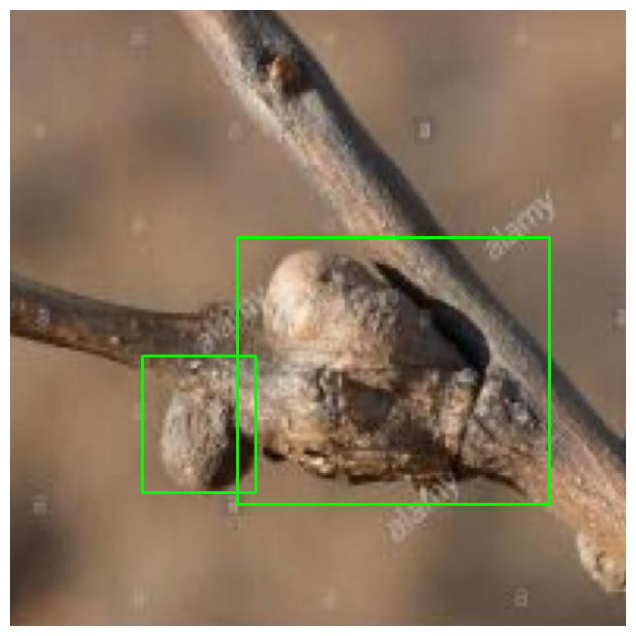

In [71]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

def show_bboxes(image_path: str, weights_path: str, conf: float = 0.3):
    """
    Runs YOLO inference on a single image and displays it with bounding boxes.

    Args:
        image_path   (str): path to input image.
        weights_path (str): path to YOLO .pt weights file.
        conf         (float): confidence threshold (0–1).
    """
    # 1. Load model
    model = YOLO(weights_path)

    # 2. Run inference
    results = model.predict(source=image_path, conf=conf)[0]

    # 3. Read image
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Cannot load image at {image_path}")

    # 4. Draw each box
    for box in results.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # 5. Convert BGR → RGB and display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

# Example call (same indentation level as def):
show_bboxes(
    '/kaggle/input/knotsdetection1/test/images/Capture-d-ecran-2025-07-01-110450_jpg.rf.12532c2cc5621c2198fc5482df5d8623.jpg',
    '/kaggle/working/runs/detect/knots_manual_freeze/weights/best.pt',
    conf=0.3
)